# Calcium Oscillation Modelling

## Credits

- **Original Paper**: Gonzalo Pizarro, J. Fernando Olivera, The dynamics of Ca<sup>2+</sup> within the sarcoplasmic reticulum of frog skeletal muscle. A simulation study,  *Journal of Theoretical Biology*, **504**(7), 2020, https://doi.org/10.1016/j.jtbi.2020.110371
- **Searching Related Papers**: Haoran Nie, Rui Zhu, Yihan Xiong, Yuanhao Li
- **Reading Paper and Understanding the Model Dynamics**: Rui Zhu, Haoran Nie
- **Model Implementation**: Rui Zhu, Haoran Nie
- **Report Writing**: Rui Zhu, Haoran Nie, Yihan Xiong
- **Presentation Preparation**: Longji Zhang, Tao Yu
- **Presentation**: Rui Zhu, Yuanhao Li

> **NOTE**
>
> Although the report **SEEMS** to be very comprehensive, we haven't thoroughly comprehended all the functions and parameters described in the code. We are still working on them. Additionally, conducting further tests is required to validate predictions of the model and refine our understanding of calcium dynamics.

## Background

### Calcium release mechanism

Skeletal muscle contraction is triggered by the release of Ca²⁺ from the sarcoplasmic reticulum (SR) through ryanodine receptors (RyRs). RyRs are divided into two subtypes (α and β), with the α subtype located at the junction between the SR and transverse tubules, regulated by voltage sensors (DHPR); the β subtype is situated in non-junctional areas and may be activated by calcium-induced calcium release (CICR), although its physiological role is controversial. 

In experiments, the addition of high concentrations of exogenous buffers (such as BAPTA/EGTA) inhibited β subtype-dependent calcium-induced calcium release (CICR) and directly activated the α subtype (coupled with DHPR) through voltage clamp, where its release flux dominates, simplifying differentiation. 

**Calcium-Induced Calcium Release (CICR)** is an intracellular calcium signaling amplification mechanism, wherein calcium ions (Ca²⁺) themselves act as the triggering factor by activating specific calcium channels (such as ryanodine receptors, RyR), further promoting the release of more calcium ions from intracellular calcium stores (such as the sarcoplasmic reticulum/SR). This process plays a crucial role in excitation-contraction coupling (ECC). 

In cardiac myocytes, CICR is the main mechanism of excitation-contraction coupling. Cell membrane depolarization activates L-type calcium channels (DHPR), and a small influx of Ca²⁺ triggers the opening of RyRs on the SR (mainly the RyR2 subtype), releasing a large amount of Ca²⁺ that drives cardiac contraction.

### The role of exogenous buffers
In the study of calcium signaling, exogenous buffers are often used to manipulate the dynamics of calcium ions (Ca²⁺) in cells. These buffers can bind to free Ca²⁺ ions, effectively reducing their concentration and altering the kinetics of calcium signaling pathways.

Exogenous buffers can be classified into two categories based on their binding kinetics: fast-binding buffers and slow-binding buffers. Fast-binding buffers (e.g., BAPTA) bind to Ca²⁺ ions rapidly, while slow-binding buffers (e.g., EGTA) bind more slowly. The choice of buffer can significantly influence the dynamics of calcium signaling.

Using fast-binding buffers (such as BAPTA) and slow-binding ones (such as EGTA) to study Ca²⁺ signaling. Experiments have found that BAPTA significantly slows down the rate of Ca²⁺ decline in the SR (τ ≈ 400 ms), while EGTA has a smaller effect (τ ≈ 150 ms), suggesting that CICR may play a role in physiological release.

BAPTA is a fast-binding calcium buffer that reduces the calcium permeability of the sarcoplasmic reticulum (SR) through the following mechanisms:

### The role of CICR

In skeletal muscle, β-type ryanodine receptors (RyRβ) are activated by cytosolic calcium concentration (i.e., CICR), and BAPTA can rapidly bind to free calcium in the cytosol (binding rate is about 100 times faster than EGTA), significantly reducing the diffusion range of calcium ions.

This rapid binding of BAPTA to calcium ions can effectively limit the diffusion of calcium signals, thereby inhibiting the amplification of calcium release through CICR. The following mechanisms are involved:

1. **Limiting calcium signal diffusion**: The high binding speed of BAPTA "traps" calcium ions near the release site, preventing calcium signals from diffusing to adjacent RyRβ channels, thereby inhibiting the amplifying effect of CICR on release.
2. **Reducing calcium concentration**: BAPTA rapidly binds to free calcium ions, reducing the local calcium concentration around RyRβ channels. This decrease in calcium concentration can lead to a reduced activation of RyRβ channels, further inhibiting CICR.
3. **Inhibiting calcium release**: The combined effects of limited diffusion and reduced calcium concentration can significantly inhibit the overall calcium release from the SR, impacting muscle contraction dynamics.
4. **Calcium-induced calcium release (CICR)**: In the presence of BAPTA, the calcium-induced calcium release mechanism is inhibited, as the rapid binding of BAPTA to calcium ions prevents the activation of RyRβ channels by local calcium signals.
5. **Calcium buffering**: BAPTA acts as a calcium buffer, effectively sequestering calcium ions and reducing their availability for binding to other proteins involved in muscle contraction, such as troponin and calsequestrin.
6. **Calcium homeostasis**: The rapid binding of BAPTA to calcium ions can disrupt the normal calcium homeostasis in muscle cells, leading to altered calcium signaling and muscle contraction dynamics.
7. **Calcium oscillations**: The presence of BAPTA can dampen calcium oscillations in muscle cells, leading to a more stable calcium concentration and reduced contractile force.
8. **Calcium signaling dynamics**: The interplay between calcium release and buffering can lead to complex dynamics in calcium signaling, influencing muscle contraction patterns and overall muscle function.

## Model Description

### Model Overview

This article introduces a two-chamber model for the dynamics of calcium ions (Ca²⁺) in frog skeletal muscle fibers.

### Description

- **Two-chamber model:** The model consists of two compartments, the sarcoplasmic reticulum (SR) and the cytoplasm, with the muscle fibers located in the latter.
- **Ca²⁺ binding proteins:** The model contains various Ca²⁺ binding proteins in the cytoplasm, including troponin, calsequestrin, and potentially added exogenous buffers (such as EGTA or BAPTA). The primary calcium binding protein considered in the SR is calsequestrin (CSQ), with its characteristics modeled after experimental data.
- **R calcium buffering:** The buffering effect of Ca²⁺ in the SR exhibits cooperativity, following the Hill equation. Parameters such as the total number of Ca²⁺ binding sites and the half-saturation concentration change with the initial Ca²⁺ concentration.
- **Calcium release mechanism:** The release of calcium from the SR is activated by a voltage-dependent mechanism which increases permeability of the SR membrane to Ca²⁺.

### Key Features

- **Voltage-activated Ca²⁺ permeability:** The model uses experimentally obtained permeability time courses and amplitudes to run the simulation.
- **Ca²⁺ buffering system:** The features of the Ca²⁺ buffering system in the SR change under low initial [Ca²⁺]SR conditions, exhibiting a higher buffering capacity.
- **Experimental validation:** The model successfully reproduces the transient changes of Ca²⁺ in the SR and cytoplasm that are observed in experiments.

## Model Equations

Table 1: Variables used in the model.

| Name                           |                         Description                          |
| :----------------------------- | :----------------------------------------------------------: |
| [Ca<sup>2+</sup>]              |       Free Calcium concentration in the cytoplasm (1)        |
| D                              |                 Cytoplasmic Dye (Rhod2) (1)                  |
| CaD                            |                 Ca bound Cytoplasmic Dye (1)                 |
| B                              | extrinsic Ca buffer in the cytoplasm (either EGTA or BAPTA)(1) |
| CaB                            |            Ca bound extrinsic buffer cytoplasm(1)            |
| Trop                           |                         Troponin (1)                         |
| CaTrop                         |                    Ca bound Troponin (1)                     |
| Parv                           |                       Parvalbumin (1)                        |
| MgParv                         |                 Parvalbumin bound to Mg (1)                  |
| CaParv                         |                 Parvalbumin bound to Ca (1)                  |
| R                              |                   Calcium Release Flux (2)                   |
| PF                             |                       Ca Pump Flux (2)                       |
| L                              |               SR Ca<sup>2+</sup> Leak Flux (2)               |
| [Ca<sup>2+</sup>]<sub>SR</sub> |           Free Calcium concentration in the SR (3)           |
| F                              |                Dye in the SR (Mag Fluo4) (3)                 |
| CaF                            |                     Ca bound SR Dye (3)                      |
| CSQ                            |                      Calsequestrin (3)                       |
| CaCSQ                          |               Calcium bound Calsequestrin (3)                |

---

> (1) All concentrations in $\mathrm{\mu M}$, referred to cytoplasmic volume.
> 
> (2) Change of concentration per unit time in $\mathrm{\mu M/ms}$, referred to cytoplasmic volume.
>
> (3) All concentrations in $\mathrm{\mu M}$, referred to SR volume
>

---

From Fick's First Law:

$$
\frac{d[Ca^{2+}]_{\mathrm{SR}}}{dt} = P\ A \frac{[Ca^{2+}]_{C^-} - [Ca^{2+}]_{\mathrm{SR}}}{V_{\mathrm{SR}}} \tag{1}
$$

A simplified assumption in the following treatment is that no Ca2+ enters or leaves the cell through the plasma membrane. Under this condition, the total Ca content of the cell remains constant. Thus, it holds at any time that the sum of the concentration times the volume of the compartments is a constant. Calling M to this quantity, it is presented by equation (2):

$$
M = [Ca^{2+}]_{C^-} V_{C^-} + [Ca^{2+}]_{\mathrm{SR}} V_{\mathrm{SR}} \tag{2}
$$

where $V_{C^-}$ and $V_{\mathrm{SR}}$ are the respective volumes of the cytoplasm and the SR. The volume of the cytoplasm is assumed to be constant, as well as the volume of the SR. The total volume of the cell equals to $V_{C^-} + V_{\mathrm{SR}}$.

Writing $[Ca^{2+}]_{C^-}$ in terms of $[Ca^{2+}]_{\mathrm{SR}}$ yields, we can get:

$$
[Ca^{2+}]_{C^-} = \frac{M - [Ca^{2+}]_{\mathrm{SR}} V_{\mathrm{SR}}}{V_{C^-}} \tag{3}
$$

Substituting this into equation (1) gives:

$$
\frac{d[Ca^{2+}]_{\mathrm{SR}}}{dt} = P\ A \frac{\frac{M - [Ca^{2+}]_{\mathrm{SR}} V_{\mathrm{SR}}}{V_{C^-}} - [Ca^{2+}]_{\mathrm{SR}}}{V_{\mathrm{SR}}} \tag{4}
$$

Rearranging yields, we can get a first order linear differential equation for the SR calcium concentration:

$$
\frac{d[Ca^{2+}]_{\mathrm{SR}}}{dt} = \frac{P\ A}{V_{\mathrm{SR}}} \frac{M}{V_{C^-}} - P\ A \frac{\left( V_\mathrm{C} + V_{\mathrm{SR}}\right) [Ca^{2+}]_{\mathrm{SR}}}{V_{\mathrm{C}} V_{\mathrm{SR}}} \tag{5}
$$

We can use `Python` to solve the equation (5) with the initial condition $[Ca^{2+}]_{\mathrm{SR}}(0) = 1000$, and figure out its exponential solution.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import root
from matplotlib.gridspec import GridSpec


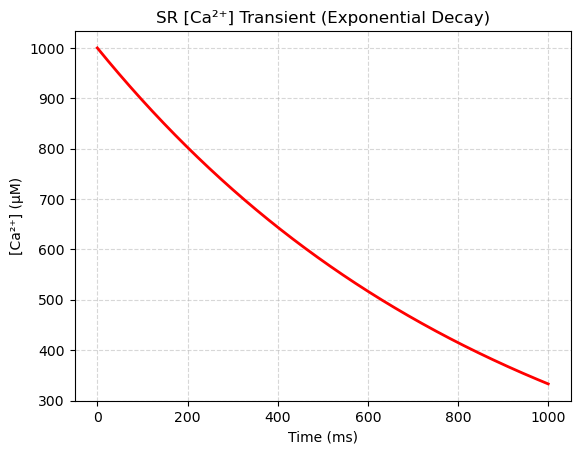

In [2]:
# Model parameters (corrected units)
P = 1.0e-3  # Permeability (μm/ms) to match time in ms
A = 1000    # Membrane area (μm²)
V_SR = 1000 # SR volume (μm³)
V_C = 10000 # Cytoplasm volume (μm³)
M = 1000    # Total calcium (μmol)
t = np.linspace(0, 1000, 1000)  # Time (ms)

# Corrected differential equation
def dCaSR(CaSR, t, P, A, V_SR, V_C, M):
    term1 = (P * A * M) / (V_C * V_SR)  # Source term
    term2 = (P * A * (V_C + V_SR) * CaSR) / (V_C * V_SR)  # Decay term
    dCaSR_dt = term1 - term2
    return dCaSR_dt

# Initial condition (μM)
CaSR0 = 1000

# Solve ODE
CaSR = odeint(dCaSR, CaSR0, t, args=(P, A, V_SR, V_C, M))

# Plot
plt.plot(t, CaSR, 'r-', linewidth=2)
plt.title('SR [Ca²⁺] Transient (Exponential Decay)')
plt.xlabel('Time (ms)')
plt.ylabel('[Ca²⁺] (μM)')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()


This first order linear differential equation has a well-known exponential solution. The rate constant of the decaying exponential solution, k, is:

$$
k = \frac{P A (V_C + V_{SR})}{V_C V_{SR}} \tag{6}
$$

Here's the code to solve the equation (6) and its half-life $t_{½}$:


In [3]:
# Model parameters (corrected units)
P = 1.0e-3  # Permeability (μm/ms) to match time in ms
A = 1000    # Membrane area (μm²)
V_SR = 1000 # SR volume (μm³)
V_C = 10000 # Cytoplasm volume (μm³)
M = 1000    # Total calcium (μmol)
t = np.linspace(0, 1000, 1000)  # Time (ms)

# Calculate k
k = (P * A * (V_C + V_SR)) / (V_C * V_SR)
print(f"Decay rate constant k = {k:.4f} ms⁻¹")

# Half-life
t_half = np.log(2) / k
print(f"Half-life t_½ = {t_half:.1f} ms")


Decay rate constant k = 0.0011 ms⁻¹
Half-life t_½ = 630.1 ms


$k = 0.0011 \mathrm{ms^{-1}}$ indicates that the calcium concentration in the SR decays at a rate of 0.11% per millisecond.

The half-life $ t_{½} = \frac{\ln(2)}{k} \approx 630 \mathrm{ms} $ indicates that after approximately 630 milliseconds, the calcium concentration in the SR decreases to half of its initial value.

Therefore, $ k $ (the inverse of the time constant $\tau$) is proportional to the permeability multiplied by a geometric factor. Additionally, the decay process can be modeled with the differential equation derived from the parameters of the system.

The simplest case of a single exponential solution is the case of a linear buffer. This is an approximation that works when the buffer follows a single-site binding equation, is at equilibrium, and is far from saturation. In this case, the total calcium concentration in each compartment (the $[Ca]_{SR}\ TOT$ and $[Ca]_{C}\ TOT$) is proportional to the free calcium concentration. In other words, the effect of the buffer is equivalent to a volume expansion. Besides, the dynamics of calcium concentration can be described by the differential equation: $\frac{d[\mathrm{Ca}]}{dt} = -k[\mathrm{Ca}]$, where $k$ represents the decay rate constant. Furthermore, it is important to consider the impact of various buffering agents on calcium dynamics.

Let $[Ca]_{SR} = [Ca^{2+}]_{SR} (E_{SR} + 1)$ and $[Ca]_{C} = [Ca^{2+}]_{C} (E_{C} + 1)$, we have:
$$
\begin{cases}
  [Ca]_{SR}\ TOT = [Ca^{2+}]_{SR} (E_{SR} + 1) \\
  [Ca]_{C}\ TOT = [Ca^{2+}]_{C} (E_{C} + 1) \tag{7}
\end{cases}
$$
The total calcium concentration in the SR and cytoplasm is given by the sum of the free calcium concentration and the bound calcium concentration. The binding of calcium to the buffer is supposed to follow a simple first-order reaction, where the rate of binding is proportional to the concentration of free calcium and the buffer. The rate of unbinding is also assumed to be proportional to the bound calcium concentration.

The rate constant is defined as follows:
$$
k = \frac{P A}{V_C} \left( \alpha (E_C + 1) + (E_{SR} + 1) \right) / \left( (E_C + 1)(E_{SR} + 1) \right) \tag{8}
$$
where $p = \frac{P A}{V_C}$ is the rate constant for the release of calcium from the SR, and $\alpha = \frac{V_C}{V_{SR}}$ is the ratio of the cytoplasmic volume to the SR volume. The rate constant $k$ is a function of the concentrations of calcium in both compartments and the binding properties of the buffers present in each compartment.

Note that the $p$ could be measured by experiment, which is the flux of calcium release divided by the calcium concentration in the SR $[Ca²⁺]_{SR}$. The volume ratio ($\frac{V_C}{V_{SR}}$) is usually estimated by morphometric studies. Under our experimental conditions, the cytoplasmic buffer concentration is high, and the cytoplasmic volume expansion may be much larger than that of the SR, $E_C \gg E_{SR}$. In addition, the volume of the SR is much smaller than that of the cytoplasm, so $\alpha \gg 1$ (usually 8 to 10). Concerning these two conditions, equation (8) can be further simplified to yield a rather concise result: 

$$
k = \frac{p \alpha}{(E_{SR} + 1)} \tag{9}
$$

Under this framework, the time constant $\tau$ is inversely proportional to the permeability:
$$
\tau = \frac{1}{k} \propto \frac{1}{P} \tag{10}
$$

From here, $k$ is the decay rate constant, given by a function of the permeability and the binding properties of the buffers present in each compartment. The time constant $\tau$ is a measure of how quickly the calcium concentration in the SR decays over time. A larger time constant indicates a slower decay, while a smaller time constant indicates a faster decay.

Therefore, doubling the time constant reflects a halving of the permeability. This kinetic effect supports our explanation: the faster buffer BAPTA reduces the permeability compared to the slower EGTA. This inhibitory effect may be caused by BAPTA inhibiting the calcium-activated component.

In the SR, we presume that there is only one naturally occurring luminal buffer, calsequestrin (CSQ). In this study, the characteristics of this buffer are modeled with our experimental results, and that is, a cooperative binding model which follows the Hill equation.

## Model Inplementation

### Initial Conditions

The initial conditions are calculated by the resting concentrations of Ca2+ in the cytoplasm and in the SR in the following equilibrium equations.It is assumed that binding to CSQ obeys the Hill equation.

$$
\text{[CaCSQ]} = \frac{CSQ_{TOT} \cdot [Ca^{2+}]^n}{K_{CSQ}^n + [Ca^{2+}]^n} \tag{11}
$$


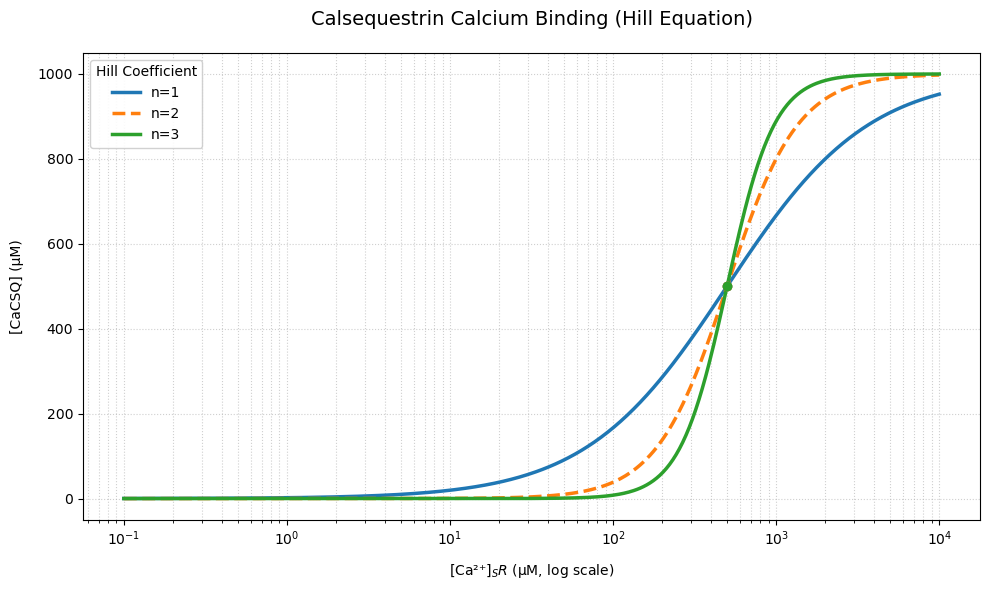

In [4]:
def calc_ca_csq(Ca_SR, CSQ_TOT, K_CSQ, n):
    """
    Calculate calcium bound to calsequestrin using Hill equation
    Args:
        Ca_SR   : Free calcium concentration in SR (μM)
        CSQ_TOT : Total calsequestrin concentration (μM)
        K_CSQ   : Dissociation constant (μM)
        n       : Hill coefficient (cooperativity)
    Returns:
        [CaCSQ] : Calcium bound to CSQ (μM)
    """
    return CSQ_TOT * (Ca_SR**n) / (K_CSQ**n + Ca_SR**n)

# Parameters
CSQ_TOT = 1000   # Total CSQ concentration (μM)
K_CSQ = 500      # Dissociation constant (μM)
n_values = [1, 2, 3]  # Different Hill coefficients to test

# Generate free calcium range (0.1 μM - 10 mM)
Ca_SR = np.logspace(-1, 4, 500)  # Logarithmic range for physiological span

# Calculate [CaCSQ] for different n values
results = {}
for n in n_values:
    results[f'n={n}'] = calc_ca_csq(Ca_SR, CSQ_TOT, K_CSQ, n)

# Plotting
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, (label, data) in enumerate(results.items()):
    plt.plot(Ca_SR, data, 
             label=label, 
             linewidth=2.5,
             color=colors[i],
             linestyle='-' if i!=1 else '--')
    
    # Mark half-saturation point ([CaCSQ]=CSQ_TOT/2)
    half_sat = CSQ_TOT/2
    idx = np.abs(data - half_sat).argmin()
    plt.scatter(Ca_SR[idx], half_sat, color=colors[i], zorder=5)
    # plt.text(Ca_SR[idx]*1.2, half_sat*0.8, 
    #          f'K_d={K_CSQ}μM\n{label}', 
    #          ha='left', va='center')

# Format plot
plt.xscale('log')
plt.yscale('linear')
plt.title('Calsequestrin Calcium Binding (Hill Equation)', pad=20, fontsize=14)
plt.xlabel('[Ca²⁺]$_SR$ (μM, log scale)', labelpad=10)
plt.ylabel('[CaCSQ] (μM)', labelpad=10)
plt.grid(True, which='both', linestyle=':', alpha=0.6)
plt.legend(title='Hill Coefficient', framealpha=0.9)



plt.tight_layout()
plt.show()


On the other hand, the dye in the SR lumen follows a one site binding isotherm (Langmuir, 1918):

$$
\text{[CaF]} = \frac{[F]_{TOT} \cdot [Ca^{2+}]_{SR}}{K_F + [Ca^{2+}]_{SR}} \tag{12}
$$


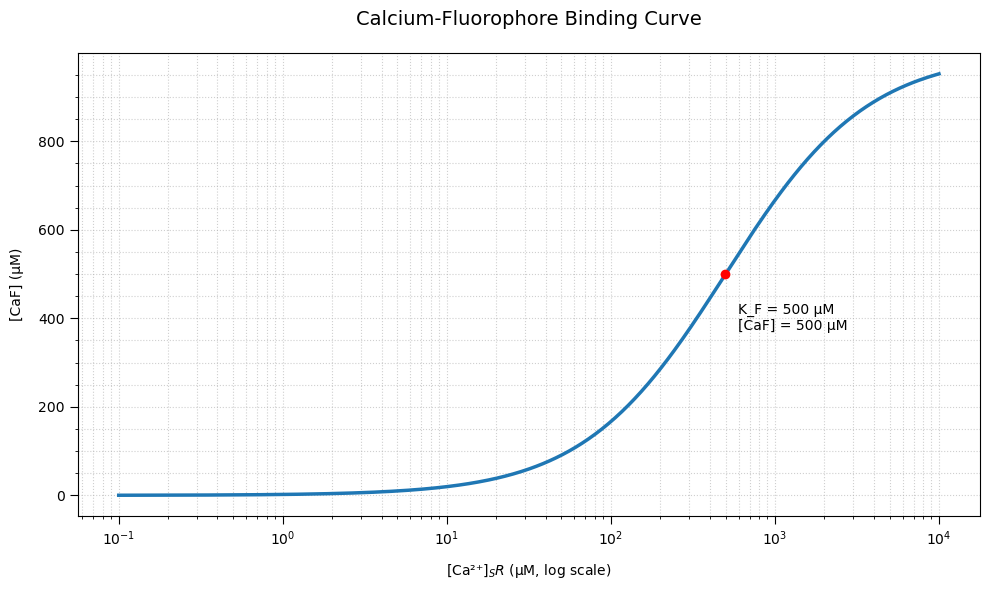

In [5]:
def calculate_ca_fluorophore(F_TOT, Ca_SR, K_F):
    """
    Calculate calcium-bound fluorophore concentration [CaF] using:
    [CaF] = [F]TOT * [Ca2+]SR / (K_F + [Ca2+]SR)
    
    Args:
        F_TOT (float): Total fluorophore concentration (μM)
        Ca_SR (float or np.ndarray): Free calcium concentration in SR (μM)
        K_F (float): Dissociation constant (μM)
    
    Returns:
        float or np.ndarray: [CaF] concentration (μM)
    """
    return F_TOT * Ca_SR / (K_F + Ca_SR)

# Parameters
F_TOT = 1000  # Total fluorophore concentration (μM)
K_F = 500     # Dissociation constant (μM)

# Generate calcium concentration range (log scale for wide dynamic range)
Ca_SR = np.logspace(-1, 4, 500)  # 0.1 μM to 10000 μM

# Calculate [CaF]
CaF = calculate_ca_fluorophore(F_TOT, Ca_SR, K_F)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Ca_SR, CaF, linewidth=2.5, color='#1f77b4')

# Mark K_F point (half-saturation)
half_sat = F_TOT/2
idx = np.abs(CaF - half_sat).argmin()
plt.scatter(Ca_SR[idx], half_sat, color='red', zorder=5)
plt.text(Ca_SR[idx]*1.2, half_sat*0.8, 
         f'K_F = {K_F} μM\n[CaF] = {half_sat:.0f} μM', 
         ha='left', va='center')

# Format plot
plt.xscale('log')
plt.yscale('linear')
plt.title('Calcium-Fluorophore Binding Curve', pad=20, fontsize=14)
plt.xlabel('[Ca²⁺]$_SR$ (μM, log scale)', labelpad=10)
plt.ylabel('[CaF] (μM)', labelpad=10)
plt.grid(True, which='both', linestyle=':', alpha=0.6)

# Automatic tick adjustment
plt.gca().tick_params(axis='both', which='major', direction='out', length=6)
plt.minorticks_on()

plt.tight_layout()
plt.show()


Troponin, the extrinsic buffer and the cytoplasmic dye also follow a one site binding isotherm. The respective equations written in terms of the on and off rate constants for $Ca^{2+}$ binding are as follows:

$$ 
\begin{cases}
  \text{[CaTrop]} = \dfrac{[Trop]_{TOT} \cdot [Ca^{2+}]_{C}}{K_{Trop} + [Ca^{2+}]_{C}} \\
  \text{[CaB]} = \dfrac{[B]_{TOT} \cdot [Ca^{2+}]_{C}}{K_B + [Ca^{2+}]_{C}} \\
  \text{[CaD]} = \dfrac{[D]_{TOT} \cdot [Ca^{2+}]_{C}}{K_D + [Ca^{2+}]_{C}} \tag{13}
\end{cases}
$$

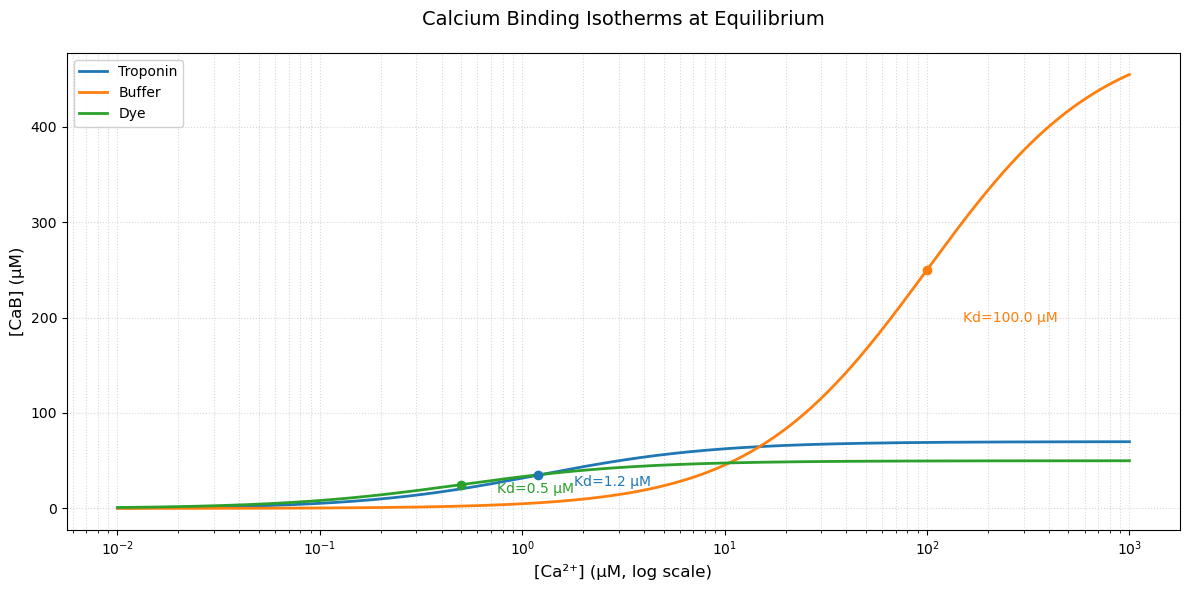

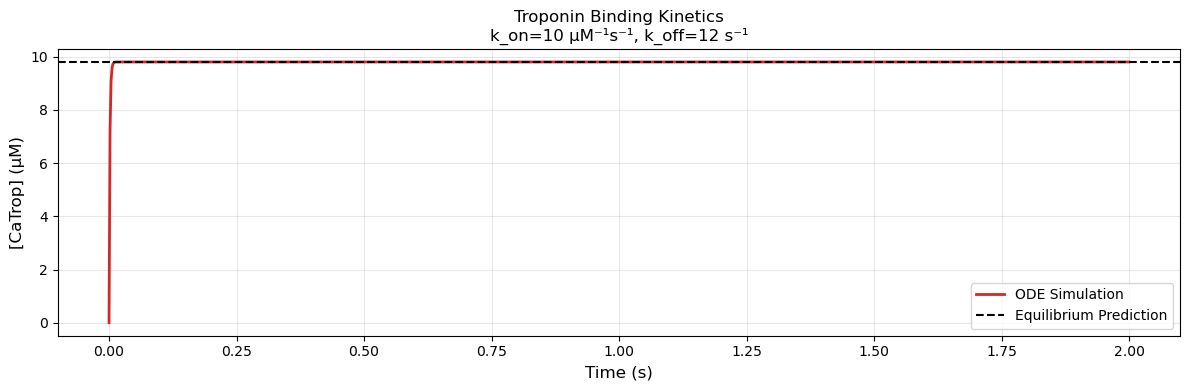

In [6]:
# 1. EQUILIBRIUM CALCULATION FUNCTION
def one_site_binding(B_TOT, Ca, k_off, k_on):
    """
    Calculate equilibrium binding using the 1-site binding isotherm equation.
    
    Args:
        B_TOT (float): Total concentration of binding sites (μM)
        Ca (float/np.array): Free calcium concentration (μM)
        k_off (float): Dissociation rate constant (s⁻¹)
        k_on (float): Association rate constant (μM⁻¹s⁻¹)
    
    Returns:
        float/np.array: Concentration of calcium-bound complex [CaB] (μM)
    """
    K_d = k_off / k_on  # Dissociation constant (μM)
    return B_TOT * Ca / (K_d + Ca)

# 2. KINETIC MODELING FUNCTION (ODE SYSTEM)
def binding_kinetics(y, t, B_TOT, k_on, k_off):
    """
    Differential equations for calcium binding kinetics.
    System: d[CaB]/dt = k_on*[Ca2+]*[B] - k_off*[CaB]
            d[Ca2+]/dt = -d[CaB]/dt (mass conservation)
    
    Args:
        y (list): Current state [Ca2+, CaB] (μM)
        t (float): Current time (s)
        B_TOT (float): Total binding sites (μM)
        k_on (float): Association rate (μM⁻¹s⁻¹)
        k_off (float): Dissociation rate (s⁻¹)
    
    Returns:
        list: Derivatives [dCa/dt, dCaB/dt]
    """
    Ca, CaB = y  # Unpack current concentrations
    B_free = B_TOT - CaB  # Calculate free binding sites
    dCaB_dt = k_on * Ca * B_free - k_off * CaB
    dCa_dt = -dCaB_dt  # Calcium conservation
    return [dCa_dt, dCaB_dt]

# 3. PARAMETERS
binding_components = {
    'Troponin': {
        'B_TOT': 70,    # Total troponin concentration (μM)
        'k_on': 10,     # Association rate (μM⁻¹s⁻¹)
        'k_off': 12     # Dissociation rate (s⁻¹)
        # Kd = 12/10 = 1.2 μM (characteristic for cardiac troponin C)
    },
    'Buffer': {
        'B_TOT': 500,   # Common EGTA-like buffer
        'k_on': 0.5,    # Slower binding
        'k_off': 50     # Kd = 100 μM (low affinity buffer)
    },
    'Dye': {
        'B_TOT': 50,    # e.g., Fluo-4 concentration
        'k_on': 8,      # Fast binding dye
        'k_off': 4      # Kd = 0.5 μM (high affinity)
    }
}

# 4. EQUILIBRIUM BINDING CURVES
Ca_range = np.logspace(-2, 3, 500)  # 0.01 μM to 1000 μM

plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colorblind-friendly palette

# Plot binding isotherms for each component
for i, (name, params) in enumerate(binding_components.items()):
    # Calculate equilibrium binding
    CaB_eq = one_site_binding(params['B_TOT'], Ca_range, 
                             params['k_off'], params['k_on'])
    
    # Plot curve
    plt.plot(Ca_range, CaB_eq, label=name, color=colors[i], linewidth=2)
    
    # Mark Kd point (half-saturation)
    K_d = params['k_off'] / params['k_on']
    half_sat = params['B_TOT'] / 2
    plt.scatter(K_d, half_sat, color=colors[i], zorder=5)
    plt.text(K_d*1.5, half_sat*0.8, f'Kd={K_d:.1f} μM', 
             ha='left', va='center', color=colors[i])

# Format plot
plt.xscale('log')
plt.xlabel('[Ca²⁺] (μM, log scale)', fontsize=12)
plt.ylabel('[CaB] (μM)', fontsize=12)
plt.title('Calcium Binding Isotherms at Equilibrium', pad=20, fontsize=14)
plt.legend(fontsize=10, framealpha=0.9)
plt.grid(True, which='both', linestyle=':', alpha=0.5)
plt.tight_layout()

# 5. KINETIC SIMULATION (DYNAMIC VALIDATION)
# Simulate troponin binding kinetics from initial calcium pulse
troponin_params = binding_components['Troponin']

# Initial conditions: 10 μM Ca²⁺ pulse, no initial binding
y0 = [10, 0]  
t = np.linspace(0, 2, 1000)  # 2 second simulation

# Solve ODE
solution = odeint(binding_kinetics, y0, t, 
                 args=(troponin_params['B_TOT'], 
                       troponin_params['k_on'], 
                       troponin_params['k_off']))
Ca_dyn, CaB_dyn = solution.T  # Unpack results

# Calculate theoretical equilibrium for validation
final_Ca = y0[0] - CaB_dyn[-1]  # Conservation: Ca_initial = Ca_free + Ca_bound
CaB_theory = one_site_binding(troponin_params['B_TOT'], 
                             final_Ca, 
                             troponin_params['k_off'], 
                             troponin_params['k_on'])

# Plot kinetics
plt.figure(figsize=(12, 4))
plt.plot(t, CaB_dyn, label='ODE Simulation', color='#d62728', linewidth=2)
plt.axhline(CaB_theory, linestyle='--', color='k', 
            label='Equilibrium Prediction')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('[CaTrop] (μM)', fontsize=12)
plt.title('Troponin Binding Kinetics\n' +
          f"k_on={troponin_params['k_on']} μM⁻¹s⁻¹, " +
          f"k_off={troponin_params['k_off']} s⁻¹",
          fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


#### Parvalbumin Binding Dynamics

$\mathrm{Mg^{2+}}$ or $\mathrm{Ca^{2+}}$ binds to the same site on Parvalbumin, showing competition between both ions. Therefore, the concentrations of $\mathrm{Mg^{2+}}$ bound and $\mathrm{Ca^{2+}}$ bound forms as well as the free parvalbumin depend on the concentrations of both divalent cations.

System of equations (14) defines the microscopic dissociation constants for $\mathrm{Ca^{2+}}$ and $\mathrm{Mg^{2+}}$ respectively, as the ratios of the off and on rates:

$$
\begin{cases}
  \mathrm{Kd_{Ca}} = \dfrac{\mathrm{koff_{Ca}}}{\mathrm{kon_{Ca}}} \\
  \mathrm{Kd_{Mg}} = \dfrac{\mathrm{koff_{Mg}}}{\mathrm{kon_{Mg}}} \tag{14}
\end{cases}
$$


System of equations (15) gives the apparent dissociation constants when both divalent cations are present:

$$
\begin{cases}
  \mathrm{K_{Mg}} = \mathrm{Kd_{Mg}} \left(1 + \dfrac{\mathrm{[{Ca}^{2+}_C]}}{\mathrm{Kd_{Ca}}}\right) \\
  \mathrm{K_{Ca}} = \mathrm{Kd_{Ca}} \left(1 + \dfrac{\mathrm{[{Mg}^{2+}_C]}}{\mathrm{Kd_{Mg}}}\right) \tag{15}
\end{cases}
$$

The apparent dissociation constants are defined as the ratios of the off and on rates, taking into account the presence of both divalent cations.

Using the apparent dissociation constants, the bound forms of ions to parvalbumin were calculated as:

$$
\begin{cases}
  \text{[CaParv]} = \dfrac{\mathrm{[Parv]_{TOT} \cdot [{Ca}^{2+}]_{C}}}{\mathrm{K_{Ca} + [{Ca}^{2+}]_{C}}} \\
  \text{[MgParv]} = \dfrac{\mathrm{[Parv]_{TOT} \cdot [{Mg}^{2+}]_{C}}}{\mathrm{K_{Mg} + [{Mg}^{2+}]_{C}}} \tag{16}
\end{cases}
$$


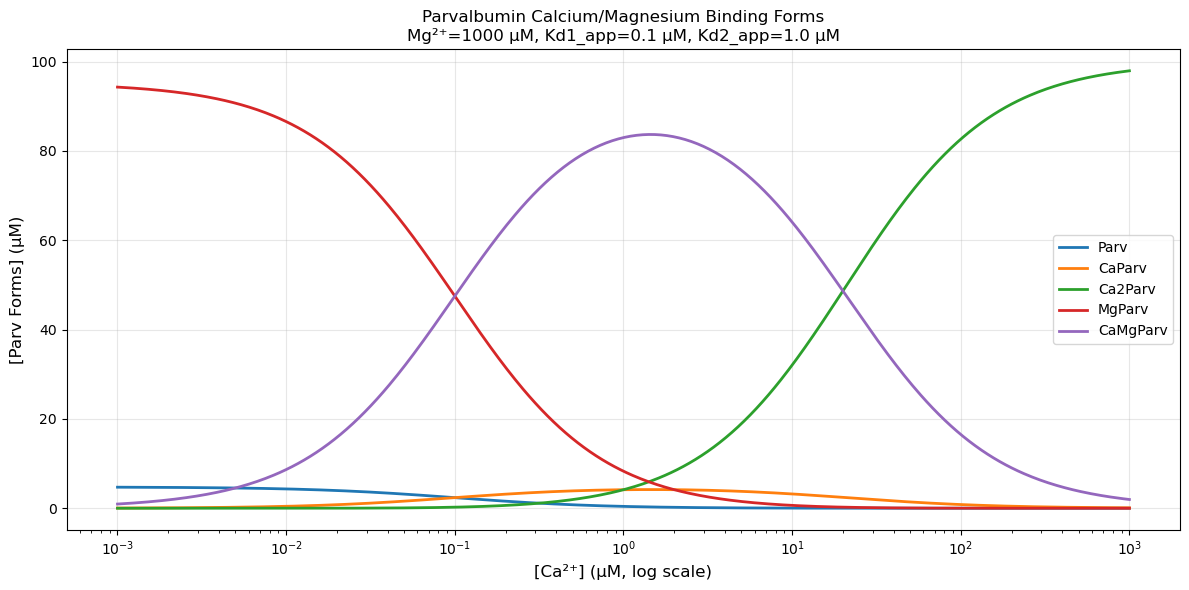

In [7]:
def calculate_parv_forms(Parv_TOT, Ca, Mg, Kd1_app, Kd2_app, Kd_Mg_app):
    """
    Calculate concentrations of all ion-bound forms of parvalbumin.
    
    Args:
        Parv_TOT: Total parvalbumin concentration (μM)
        Ca, Mg: Free Ca²⁺ and Mg²⁺ concentrations (μM)
        Kd1_app, Kd2_app: Apparent dissociation constants for Ca²⁺ binding (μM)
        Kd_Mg_app: Apparent dissociation constant for Mg²⁺ binding (μM)
    
    Returns:
        dict: Concentrations of all binding forms
    """
    # Calculate binding probabilities
    f_Ca1 = Ca / Kd1_app  # Probability of Ca²⁺ binding to site 1
    f_Ca2 = Ca / Kd2_app  # Probability of Ca²⁺ binding to site 2
    f_Mg = Mg / Kd_Mg_app  # Probability of Mg²⁺ binding
    
    # Partition function (sum of all possible states)
    Z = 1 + f_Ca1 + f_Ca1*f_Ca2 + f_Mg + f_Ca1*f_Mg
    
    # Calculate concentrations of each form
    return {
        'Parv': Parv_TOT / Z,  # Fully unbound
        'CaParv': Parv_TOT * f_Ca1 / Z,  # Single Ca²⁺ bound
        'Ca2Parv': Parv_TOT * f_Ca1 * f_Ca2 / Z,  # Double Ca²⁺ bound
        'MgParv': Parv_TOT * f_Mg / Z,  # Single Mg²⁺ bound
        'CaMgParv': Parv_TOT * f_Ca1 * f_Mg / Z  # Mixed Ca²⁺/Mg²⁺ bound
    }

# Example parameters (typical literature values)
params = {
    'Parv_TOT': 100,   # μM (total parvalbumin concentration)
    'Kd1_app': 0.1,    # μM (apparent Kd for Ca²⁺ at site 1)
    'Kd2_app': 1.0,    # μM (apparent Kd for Ca²⁺ at site 2)
    'Kd_Mg_app': 50    # μM (apparent Kd for Mg²⁺ binding)
}

# Scan Ca²⁺ concentration range (fixed Mg²⁺ at physiological level)
Ca_range = np.logspace(-3, 3, 500)  # 1 nM to 1 mM (logarithmic range)
Mg_fixed = 1000  # μM (physiological Mg²⁺ ~0.5-1 mM)

# Initialize dictionary to store results
results = {
    form: [] for form in ['Parv', 'CaParv', 'Ca2Parv', 'MgParv', 'CaMgParv']
}

# Calculate binding forms across Ca²⁺ concentrations
for Ca in Ca_range:
    forms = calculate_parv_forms(Parv_TOT=params['Parv_TOT'],
                               Ca=Ca, Mg=Mg_fixed,
                               Kd1_app=params['Kd1_app'],
                               Kd2_app=params['Kd2_app'],
                               Kd_Mg_app=params['Kd_Mg_app'])
    # Store results for each form
    for form in results:
        results[form].append(forms[form])

# Plotting
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Color scheme

# Plot each binding form
for i, (form, conc) in enumerate(results.items()):
    plt.plot(Ca_range, conc, label=form, color=colors[i], linewidth=2)

# Format plot
plt.xscale('log')
plt.xlabel('[Ca²⁺] (μM, log scale)', fontsize=12)
plt.ylabel('[Parv Forms] (μM)', fontsize=12)
plt.title('Parvalbumin Calcium/Magnesium Binding Forms\n' +
         f"Mg²⁺={Mg_fixed} μM, Kd1_app={params['Kd1_app']} μM, Kd2_app={params['Kd2_app']} μM",
         fontsize=12)
plt.legend(fontsize=10)  # Show legend with binding forms
plt.grid(alpha=0.3)  # Add light grid lines
plt.tight_layout()  # Adjust layout
plt.show()


The flow of $\mathrm{Ca^{2+}}$ into the cytoplasm is assumed to be the release flux (R) through the RyR channels:

$$
R = p \left( [Ca^{2+}]_{SR} - [Ca^{2+}]_{C} \right) \tag{17}
$$

where $p$ is the permeability of the SR membrane to $\mathrm{Ca^{2+}}$.

The SERCA pump flux (PF) that transports $\mathrm{Ca^{2+}}$ back into the SR is given by:

$$
PF = MPF \left(\dfrac{[Ca^{2+}]_{C}}{(K_{P} + [Ca^{2+}]_{C})}\right)^{2} \tag{18}
$$

where $MPF$ is the maximum flux of the SERCA pump and $K_{P}$ is the half-saturation constant for the pump.

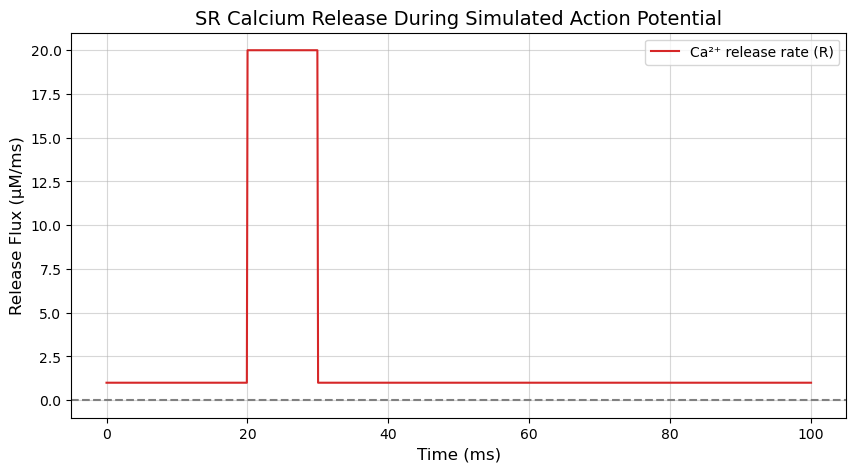

In [8]:
def calcium_release(p, Ca_SR, Ca_C):
    """Calculate Ca²⁺ release rate from SR to cytosol."""
    return p * (Ca_SR - Ca_C)

# Parameters
p_rest = 0.001       # ms⁻¹ (resting permeability, channels mostly closed)
p_activated = 0.02   # ms⁻¹ (during action potential)
Ca_SR = 1000         # μM (SR calcium concentration)
Ca_C_rest = 0.1       # μM (resting cytosolic calcium)

# Simulate release during a pulse
time = np.linspace(0, 100, 1000)  # ms
p = np.where((time > 20) & (time < 30), p_activated, p_rest)  # Channel opens at t=20-30ms
R = calcium_release(p, Ca_SR, Ca_C_rest)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time, R, color='#d62728', label='Ca²⁺ release rate (R)')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Release Flux (μM/ms)', fontsize=12)
plt.title('SR Calcium Release During Simulated Action Potential', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()


Where MPF is the maximum pump flux, Kp is the dissociation constant of the $\mathrm{{Ca}^{2+}}$ transport site on the pump. It is assumed that there are two $\mathrm{{Ca}^{2+}}$ binding sites on the pump. The two Ca²⁺ ions are supposed to bind independently to these sites and be transported simultaneously. Therefore, the pump flux is proportional to the fraction of the pump bound to two Ca²⁺ ions. Finally, the leak of $\mathrm{{Ca}^{2+}}$ from the SR (L) is assumed to be equal to the pump flux at rest and considered constant during the release process. Calling PFo to the resting pump flux, which is evaluated with equation (18) at the resting $\mathrm{{Ca}^{2+}}_{C}$, we have $L = \mathrm{PFo}$.

$$
PFo = MPF \left(\dfrac{[Ca^{2+}]_{C}}{(K_{P} + [Ca^{2+}]_{C})}\right)^{2} \tag{19}
$$

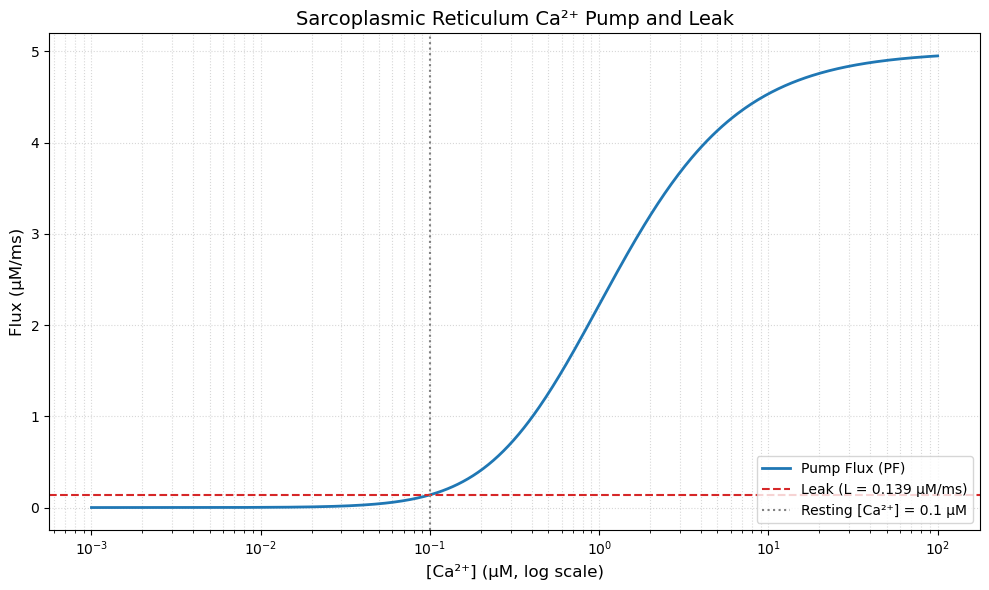

In [9]:
def pump_flux(Ca, MPF, Kp):
    """
    Calculate calcium pump flux using two-site binding model
    
    Args:
        Ca (float or np.array): Cytosolic calcium concentration (μM)
        MPF (float): Maximum pump flux (μM/ms)
        Kp (float): Dissociation constant of Ca²⁺ binding sites (μM)
    
    Returns:
        float or np.array: Pump flux (μM/ms)
    """
    return MPF * (Ca / (Kp + Ca))**2  # Square term for two binding sites

# Parameters (typical values for cardiac muscle)
MPF = 5.0    # Maximum pump flux (μM/ms)
Kp = 0.5     # Ca²⁺ dissociation constant (μM)
Ca_rest = 0.1  # Resting calcium concentration (μM)

# Calculate resting pump flux (PF0) and leak (L)
PF0 = pump_flux(Ca_rest, MPF, Kp)  # Pump flux at resting [Ca²⁺]
L = PF0  # Leak is assumed equal to resting pump flux

# Generate range of calcium concentrations (log scale from 1 nM to 100 μM)
Ca_range = np.logspace(-3, 2, 500)  # 0.001 to 100 μM
PF = pump_flux(Ca_range, MPF, Kp)  # Calculate pump flux across range

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(Ca_range, PF, 
         label='Pump Flux (PF)', 
         color='#1f77b4', 
         linewidth=2)

# Add horizontal line for leak rate
plt.axhline(L, 
            linestyle='--', 
            color='#d62728', 
            label=f'Leak (L = {L:.3f} μM/ms)')

# Add vertical line for resting calcium
plt.axvline(Ca_rest, 
            linestyle=':', 
            color='gray', 
            label=f'Resting [Ca²⁺] = {Ca_rest} μM')

# Format plot
plt.xscale('log')  # Log scale for calcium axis
plt.xlabel('[Ca²⁺] (μM, log scale)', fontsize=12)
plt.ylabel('Flux (μM/ms)', fontsize=12)
plt.title('Sarcoplasmic Reticulum Ca²⁺ Pump and Leak', fontsize=14)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True, which='both', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


To calculate the initial conditions, here we assume that the initial concentrations of $\mathrm{Ca^{2+}}$ in the cytoplasm is 0.02 $\mathrm{\mu M}$, and in the SR is 200 $\mathrm{\mu M}$, 
(2)M = [ Ca2+]SR VSR + [ Ca2+]C VC
(5)d[Ca2+]SR/dt = P A M/ (VCVSR) - P A (VC + VSR)[Ca 2+ ]SR)/ (VCVSR).
(14)[CaCSQ] = CSQTOT [Ca2+]SRn/(KCSQn + [Ca2+]SRn).
(15)[CaF] = [F]TOT [Ca2+]SR /(KF + [Ca2+]SR).
(16)[CaTrop] = [Trop] TOT [Ca2+]C /(koffT/konT + [Ca2+]C),
(17)[CaB] = [B] TOT [Ca2+]C /(koffB/konB + [Ca2+]C),
(18)[CaD] = [D] TOT [Ca2+]C /(koffD/konD + [Ca2+]C).
(19)KdCa = koffCa/konCa,
(20)KdMg = koffMg/konMg.
(21)KMg = KdMg(1 + [Ca2+]C /KdCa),
(22)KCa = KdCa(1 + [Mg2+] /KdMg).
(23)[CaParv] = [Parv] TOT [Ca2+]C /(KCa + [Ca2+]C),
(24)[MgParv] = [Parv] TOT [Mg2+] /(KMg + [Mg2+].
(25)R = p ([ Ca2+]SR- [Ca 2+ ]C).
(26)PF = MPF ([Ca2+]C /(KP + [Ca2+]C))2.
(27)L = PFo.
联立计算初始条件，


校准后的肌质网钙浓度: 2.93 μM


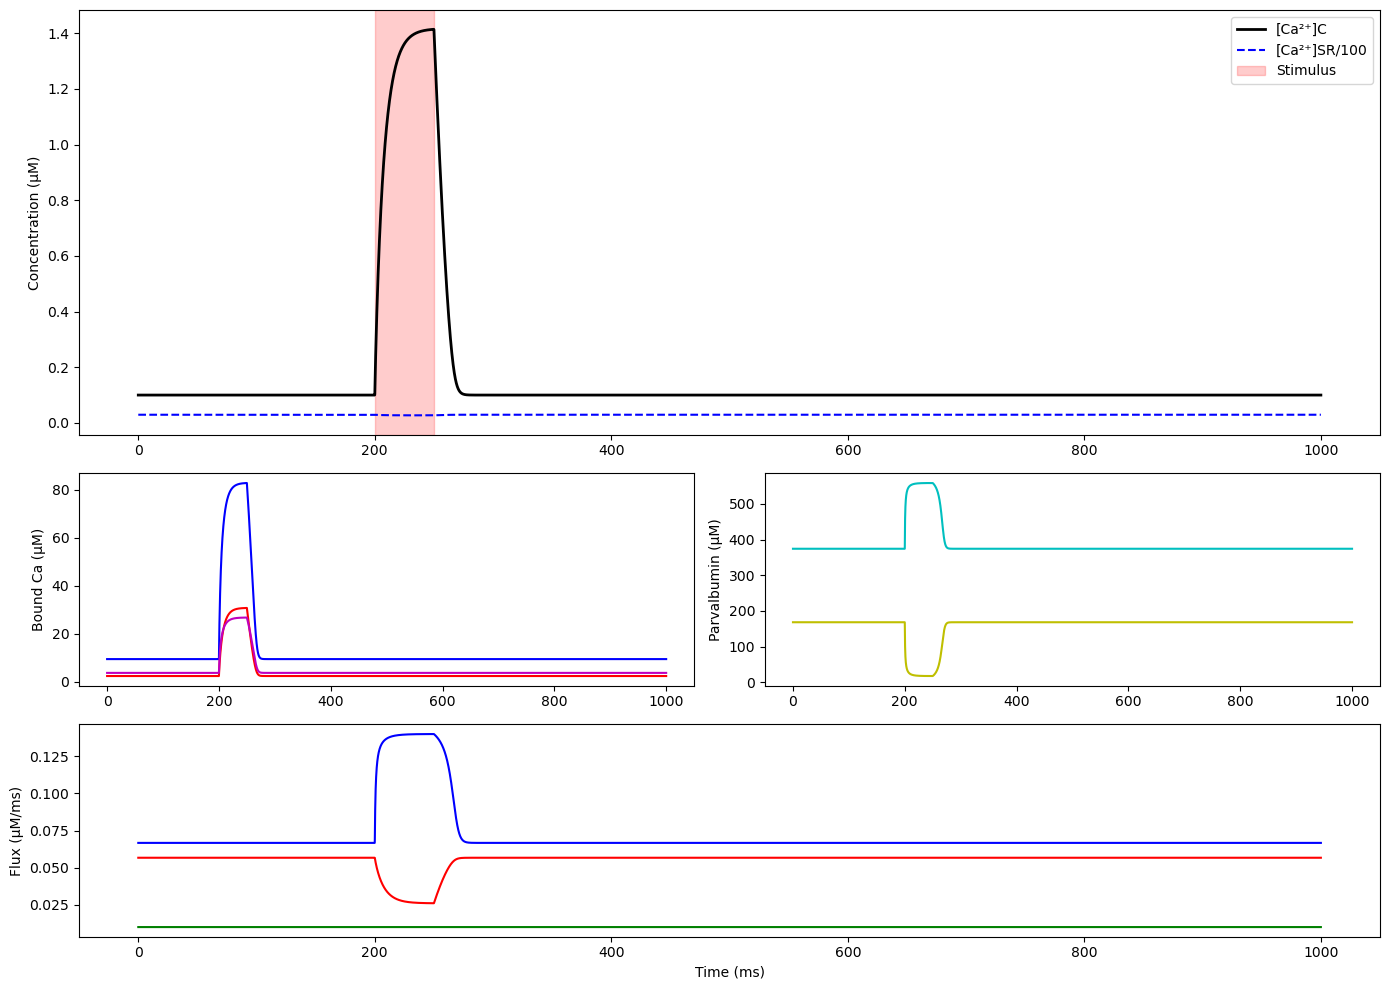

In [ ]:
import numpy as np

# 参数设置（情况1：[Ca]_SR = 200 μM）
Ca_SR = 200  # μM
Ca_C = 0.02   # μM
V_SR = 0.1    # 假设SR体积为细胞质的10%
V_C = 1.0

# SR中的缓冲计算（Calsequestrin和MagFluo4）
CSQ_TOT = 28070  # μM
K_CSQ = 333      # μM
n = 2.2
F_TOT = 6800     # μM
K_F = 90         # μM

# 计算 [CaCSQ]
numerator_CSQ = CSQ_TOT * (Ca_SR ** n)
denominator_CSQ = (K_CSQ ** n) + (Ca_SR ** n)
CaCSQ = numerator_CSQ / denominator_CSQ

# 计算 [CaF]
CaF = (F_TOT * Ca_SR) / (K_F + Ca_SR)

# SR总钙量
Total_SR_Ca = Ca_SR + CaCSQ + CaF

# 细胞质中的EGTA缓冲
B_TOT_EGTA = 20000  # μM
k_on_EGTA = 0.001    # /μM/ms
k_off_EGTA = 0.0004  # /ms
Kd_EGTA = k_off_EGTA / k_on_EGTA
CaB_EGTA = (B_TOT_EGTA * Ca_C) / (Kd_EGTA + Ca_C)

# Parvalbumin缓冲（考虑Mg²⁺竞争）
Parv_TOT = 500       # μM
Mg = 900             # μM
k_on_Mg = 1.5e-5     # /μM/ms
k_off_Mg = 0.003     # /ms
k_on_Ca = 0.1        # /μM/ms
k_off_Ca = 0.001     # /ms

Kd_Mg = k_off_Mg / k_on_Mg
Kd_Ca = k_off_Ca / k_on_Ca
K_Mg = Kd_Mg * (1 + Ca_C / Kd_Ca)
K_Ca = Kd_Ca * (1 + Mg / Kd_Mg)

CaParv = (Parv_TOT * Ca_C) / (K_Ca + Ca_C)
MgParv = (Parv_TOT * Mg) / (K_Mg + Mg)

Trop_TOT = 240      # μM (表3)
k_onT = 0.125        # /μM/ms (表3)
k_offT = 1.2         # /ms (表3)
Kd_Trop = k_offT / k_onT
CaTrop = (Trop_TOT * Ca_C) / (Kd_Trop + Ca_C)

# 细胞质总钙量（包括游离钙和所有结合形式）
Total_C_Ca = Ca_C + CaB_EGTA + CaParv + CaTrop  # 新增CaTrop

# 总钙量M（SR和细胞质）
M = Ca_SR * V_SR + Total_C_Ca * V_C  # 使用Total_C_Ca而非仅Ca_C

# 输出结果
print("SR中钙分布：")
print(f"[Ca²⁺]_SR: {Ca_SR} μM")
print(f"[CaCSQ]: {CaCSQ:.2f} μM")
print(f"[CaF]: {CaF:.2f} μM")
print(f"SR总钙量: {Total_SR_Ca:.2f} μM\n")

print("细胞质中钙结合：")
print(f"[Ca²⁺]_C: {Ca_C} μM")
print(f"[EGTA结合]: {CaB_EGTA:.2f} μM")
print(f"[Parv结合Ca]: {CaParv:.2f} μM")
print(f"[Troponin结合Ca]: {CaTrop:.2f} μM") 
print(f"[Parv结合Mg]: {MgParv:.2f} μM\n")

print(f"系统总钙量 M = {M:.2f} μM·volume")

### Compartments

#### SR Compartment

The following differential equations are applied for the SR compartment.

As mentioned, within the SR we consider only one intrinsic buffer, CSQ. The indicator dye is a minor contributor to the overall buffering. The binding of Ca2+ to CSQ and to the dye is assumed to be very fast and thereby is treated as equilibrium in both cases.

Simultaneous equation (20) give the buffer power of each Ca binding species.

$$
\begin{cases}
  E_{CSQ} = \dfrac{n \cdot CSQ_{TOT} \cdot K_{CSQ}^n \cdot [Ca^{2+}]_{SR}^{n-1}}{(K_{CSQ}^n + [Ca^{2+}]_{SR}^{n})^2} \\
  E_F = \dfrac{F_{TOT} \cdot K_F}{(K_F + [Ca^{2+}]_{SR})^2} \tag{20}
\end{cases}
$$

In [2]:
import numpy as np

# 参数设置（情况1：[Ca]_SR = 200 μM）
Ca_SR = 200  # μM
Ca_C = 0.02   # μM
V_SR = 0.1    # 假设SR体积为细胞质的10%
V_C = 1.0

# SR中的缓冲计算（Calsequestrin和MagFluo4）
CSQ_TOT = 28070  # μM
K_CSQ = 333      # μM
n = 2.2
F_TOT = 6800     # μM
K_F = 90         # μM

# 计算 [CaCSQ]
numerator_CSQ = CSQ_TOT * (Ca_SR ** n)
denominator_CSQ = (K_CSQ ** n) + (Ca_SR ** n)
CaCSQ = numerator_CSQ / denominator_CSQ

# 计算 [CaF]
CaF = (F_TOT * Ca_SR) / (K_F + Ca_SR)

# SR总钙量
Total_SR_Ca = Ca_SR + CaCSQ + CaF

# 细胞质中的EGTA缓冲
B_TOT_EGTA = 20000  # μM
k_on_EGTA = 0.001    # /μM/ms
k_off_EGTA = 0.0004  # /ms
Kd_EGTA = k_off_EGTA / k_on_EGTA
CaB_EGTA = (B_TOT_EGTA * Ca_C) / (Kd_EGTA + Ca_C)

# Parvalbumin缓冲（考虑Mg²⁺竞争）
Parv_TOT = 500       # μM
Mg = 900             # μM
k_on_Mg = 1.5e-5     # /μM/ms
k_off_Mg = 0.003     # /ms
k_on_Ca = 0.1        # /μM/ms
k_off_Ca = 0.001     # /ms

Kd_Mg = k_off_Mg / k_on_Mg
Kd_Ca = k_off_Ca / k_on_Ca
K_Mg = Kd_Mg * (1 + Ca_C / Kd_Ca)
K_Ca = Kd_Ca * (1 + Mg / Kd_Mg)

CaParv = (Parv_TOT * Ca_C) / (K_Ca + Ca_C)
MgParv = (Parv_TOT * Mg) / (K_Mg + Mg)

Trop_TOT = 240      # μM (表3)
k_onT = 0.125        # /μM/ms (表3)
k_offT = 1.2         # /ms (表3)
Kd_Trop = k_offT / k_onT
CaTrop = (Trop_TOT * Ca_C) / (Kd_Trop + Ca_C)

# 细胞质总钙量（包括游离钙和所有结合形式）
Total_C_Ca = Ca_C + CaB_EGTA + CaParv + CaTrop  # 新增CaTrop

# 总钙量M（SR和细胞质）
M = Ca_SR * V_SR + Total_C_Ca * V_C  # 使用Total_C_Ca而非仅Ca_C

# 输出结果
print("SR中钙分布：")
print(f"[Ca²⁺]_SR: {Ca_SR} μM")
print(f"[CaCSQ]: {CaCSQ:.2f} μM")
print(f"[CaF]: {CaF:.2f} μM")
print(f"SR总钙量: {Total_SR_Ca:.2f} μM\n")

print("细胞质中钙结合：")
print(f"[Ca²⁺]_C: {Ca_C} μM")
print(f"[EGTA结合]: {CaB_EGTA:.2f} μM")
print(f"[Parv结合Ca]: {CaParv:.2f} μM")
print(f"[Troponin结合Ca]: {CaTrop:.2f} μM") 
print(f"[Parv结合Mg]: {MgParv:.2f} μM\n")

print(f"系统总钙量 M = {M:.2f} μM·volume")

SR中钙分布：
[Ca²⁺]_SR: 200 μM
[CaCSQ]: 6897.13 μM
[CaF]: 4689.66 μM
SR总钙量: 11786.79 μM

细胞质中钙结合：
[Ca²⁺]_C: 0.02 μM
[EGTA结合]: 952.38 μM
[Parv结合Ca]: 133.33 μM
[Troponin结合Ca]: 0.50 μM
[Parv结合Mg]: 300.00 μM

系统总钙量 M = 1106.23 μM·volume


At any given moment, all forms of Ca within the SR satisfy equation (21).

$$
[Ca^{2+}]_{SR} + [CaF] + [CaCSQ] = [Ca]_{SR}\ TOT \tag{21}
$$

The variation of total Ca in the SR per unit change in free Ca2+ is given by equation (22) and its changing rate by equation (23).

$$
\frac{d[Ca]_{SR\ TOT}}{d[Ca^{2+}]_{SR}} = 1 + E_{CSQ} + E_F \tag{22}
$$
$$
\frac{d[Ca]_{SR\ TOT}}{dt} = \left(\frac{d[Ca]_{SR\ TOT}}{d[Ca^{2+}]_{SR}}\right) \left(\frac{d[Ca^{2+}]_{SR}}{dt}\right) \tag{23}
$$

The changing rate of total Ca concentration in the SR is the result of the Ca2+ fluxes balance, scaled by the ratio of volumes, as they are defined referring to the cytoplasmic volume. This is evaluated with equation (24) and the rate of change in free Ca2+ with equation (25).

$$
\frac{d[Ca]_{SR\ TOT}}{dt} = (-R-L + PF) \frac{V_C}{V_{SR}} \tag{24}
$$
$$
\frac{d[Ca^{2+}]_{SR}}{dt} = \frac{d[Ca]_{SR\ TOT}}{dt} \frac{1}{(1 + E_{CSQ} + E_F)} \tag{25}
$$

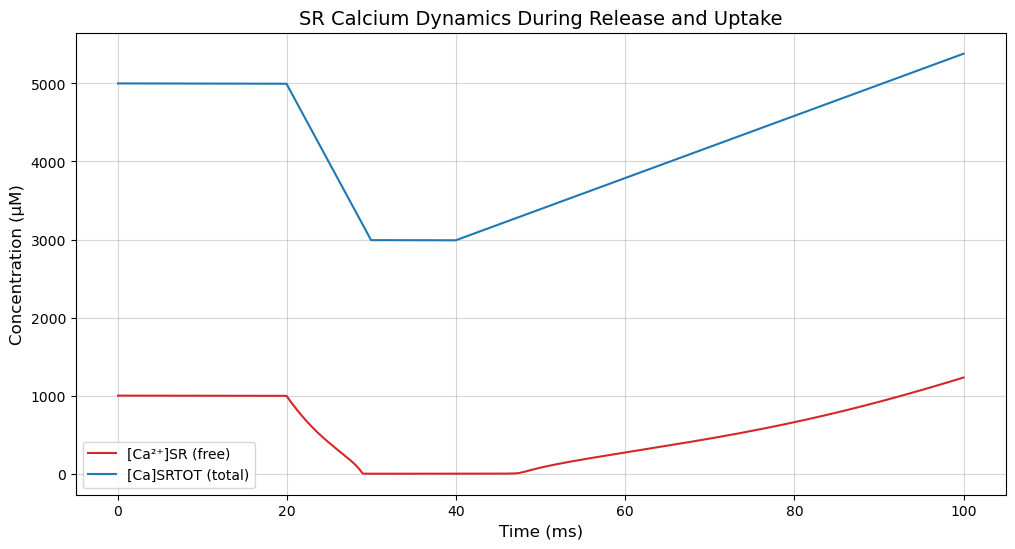

In [12]:
# Parameters
V_C = 20.0    # Cytosolic volume (μm³)
V_SR = 1.0    # Sarcoplasmic reticulum volume (μm³)
CSQ_TOT = 1000  # Total calsequestrin concentration (μM)
K_CSQ = 500    # Calsequestrin dissociation constant (μM)
n = 2          # Hill coefficient (cooperativity)
F_TOT = 100    # Total high-affinity buffer concentration (μM)
K_F = 1        # High-affinity buffer dissociation constant (μM)

# Buffer capacity functions
def E_CSQ(Ca_SR):
    """
    Calculate calsequestrin buffering capacity.
    
    Args:
        Ca_SR (float): Free calcium concentration in SR (μM)
    
    Returns:
        float: Buffering capacity (μM⁻¹)
    """
    numerator = n * CSQ_TOT * (K_CSQ**n) * (Ca_SR**(n-1))
    denominator = (K_CSQ**n + Ca_SR**n)**2
    return numerator / denominator

def E_F(Ca_SR):
    """
    Calculate high-affinity buffer capacity.
    
    Args:
        Ca_SR (float): Free calcium concentration in SR (μM)
    
    Returns:
        float: Buffering capacity (μM⁻¹)
    """
    return F_TOT * K_F / (K_F + Ca_SR)**2

# Differential equations for SR calcium dynamics
def dCa_dt(t, y, R_func, L_func, PF_func):
    """
    Calculate derivatives of free and total SR calcium concentrations.
    
    Args:
        t (float): Time (ms)
        y (list): [Ca_SR, Ca_SR_TOT] current concentrations (μM)
        R_func, L_func, PF_func: Functions for release, leak and pump fluxes
    
    Returns:
        list: [dCa_SR/dt, dCa_SR_TOT/dt]
    """
    Ca_SR, Ca_SR_TOT = y
    
    # Calculate total buffering capacity
    E_total = 1 + E_CSQ(Ca_SR) + E_F(Ca_SR)
    
    # Rate of change of total SR calcium
    dCa_TOT = (-R_func(t) - L_func(t) + PF_func(t)) * (V_C / V_SR)
    
    # Rate of change of free SR calcium (buffered by proteins)
    dCa_SR = dCa_TOT / E_total
    
    return [dCa_SR, dCa_TOT]

# Simulation parameters
t_span = (0, 100)  # Time range (ms)
t_eval = np.linspace(*t_span, 1000)  # Time points for evaluation

# Calcium flux functions
def R(t):
    """Calcium release flux (μM/ms)"""
    return 10.0 if 20 < t < 30 else 0.0  # Active release between 20-30ms

def L(t):
    """Constant calcium leak flux (μM/ms)"""
    return 0.01

def PF(t):
    """Calcium pump flux (μM/ms)"""
    return 2.0 if t > 40 else 0.0  # Pump activates after 40ms

# Initial conditions [free Ca²⁺, total Ca] in SR (μM)
y0 = [1000.0, 5000.0]

# Numerical integration (Euler method)
dt = t_eval[1] - t_eval[0]
Ca_SR = [y0[0]]  # Free calcium history
Ca_TOT = [y0[1]]  # Total calcium history

for t in t_eval[1:]:
    # Calculate derivatives
    dCa_SR, dCa_TOT = dCa_dt(t, [Ca_SR[-1], Ca_TOT[-1]], R, L, PF)
    
    # Update concentrations
    Ca_SR.append(Ca_SR[-1] + dCa_SR * dt)
    Ca_TOT.append(Ca_TOT[-1] + dCa_TOT * dt)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t_eval, Ca_SR, label='[Ca²⁺]SR (free)', color='#d62728')
plt.plot(t_eval, Ca_TOT, label='[Ca]SRTOT (total)', color='#1f77b4')
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Concentration (μM)', fontsize=12)
plt.title('SR Calcium Dynamics During Release and Uptake', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()


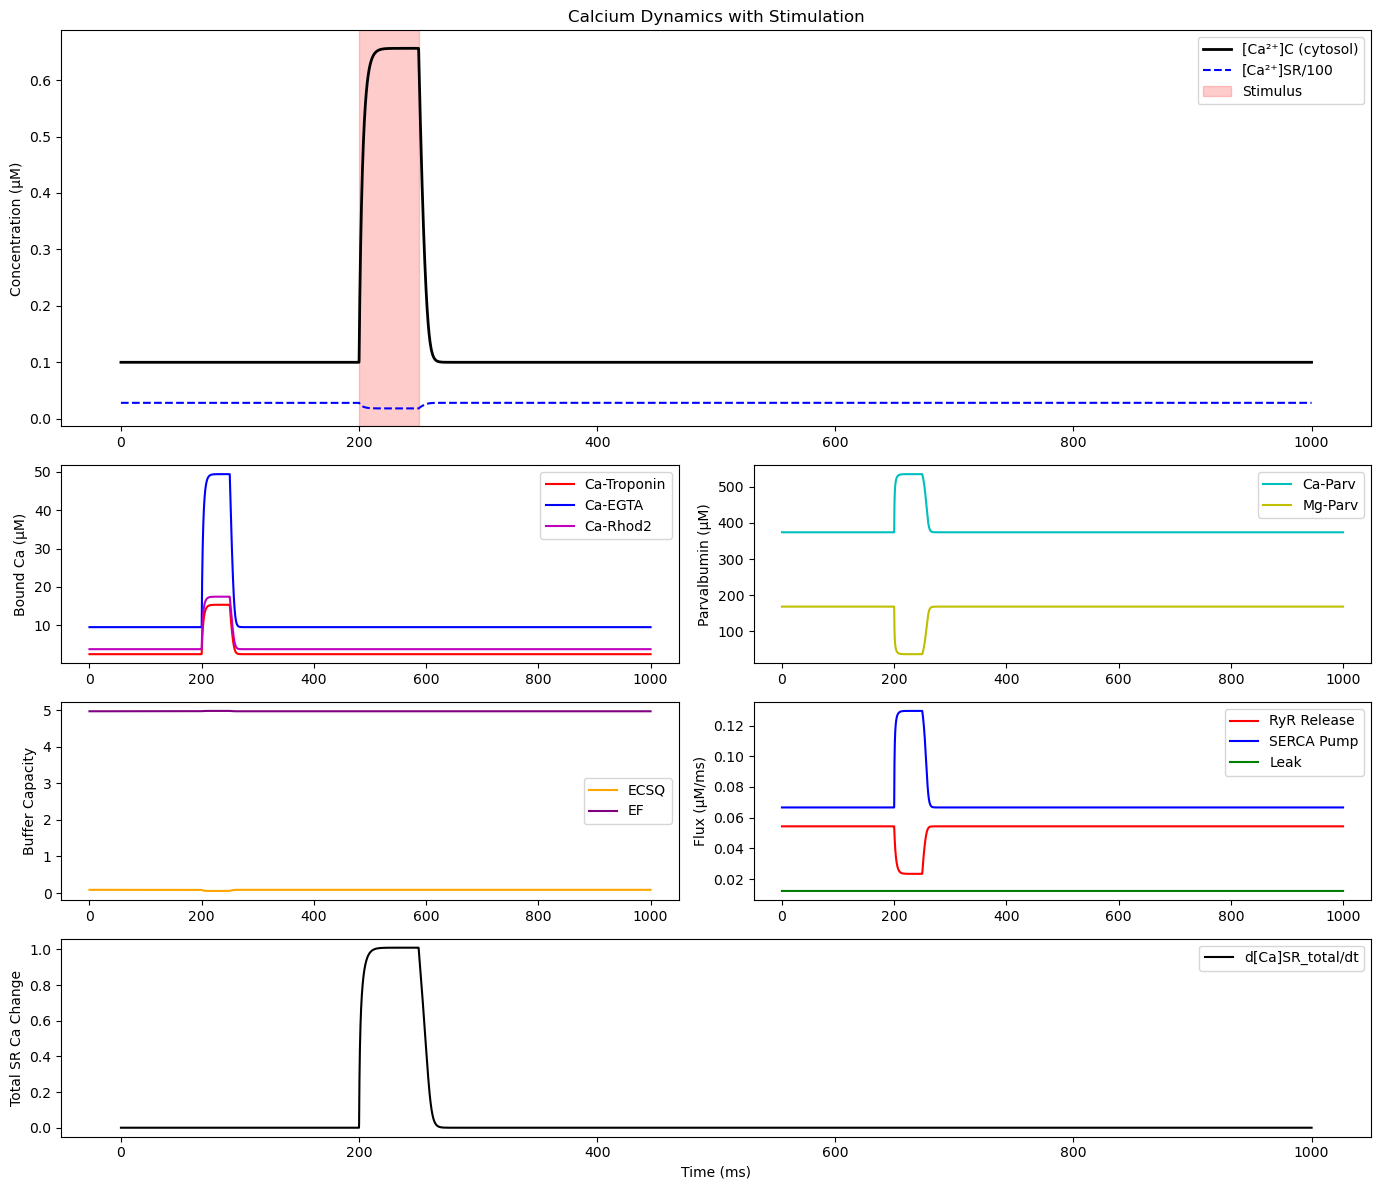

稳态验证: dCaC/dt = -2.36e-16, dCaSR/dt = 0.00e+00
初始缓冲容量: 1 + ECSQ + EF = 6.1


In [13]:
# ======================
# 参数配置
# ======================
params = {
    # 肌质网缓冲参数
    'CSQ_TOT': 10000,    # 钙螯合蛋白总量 (μM)
    'K_CSQ': 800,        # CSQ解离常数
    'n': 2,              # Hill系数
    'F_TOT': 5000,       # 肌质网游离钙缓冲容量
    'K_F': 1000,         # 肌质网缓冲亲和力
    
    # 胞质缓冲参数
    'Trop_TOT': 240,     # 肌钙蛋白总量
    'konT': 0.125,       # 肌钙蛋白结合速率 (μM⁻¹ms⁻¹)
    'koffT': 1.2,        # 肌钙蛋白解离速率 (ms⁻¹)
    'B_TOT': 200,        # EGTA总量
    'konB': 0.005,       # EGTA结合速率
    'koffB': 0.01,       # EGTA解离速率
    'D_TOT': 50,         # Rhod-2总量
    'konD': 0.09,        # Rhod-2结合速率
    'koffD': 0.11,       # Rhod-2解离速率,
    
    # 小清蛋白参数
    'Parv_TOT': 580,     # 小清蛋白总量
    'konCa': 0.1,        # Ca²⁺结合速率
    'koffCa': 0.001,     # Ca²⁺解离速率
    'konMg': 1.5e-5,     # Mg²⁺结合速率
    'koffMg': 0.003,     # Mg²⁺解离速率
    'Mg': 900,           # 胞内Mg²⁺浓度 (μM),
    
    # 钙流动力学参数
    'p': 0.02,           # RyR释放系数
    'M_PF': 0.15,        # SERCA最大速率 (μM/ms)
    'K_P': 0.05,         # SERCA半激活浓度 (μM)
    'PF0': 0.0123,       # 基础泄漏 (μM/ms), 已校准
    
    # 体积参数
    'Vc': 25.84,         # 胞质体积 (pL)
    'V_SR': 2.4,         # 肌质网体积 (pL),
    
    # 初始条件
    'CaC_rest': 0.1,     # 静息胞质钙 (μM)
    'CaSR_rest': 1500    # 静息肌质网钙 (μM)
}

# ======================
# 缓冲动力学方程 (14)-(18)
# ======================
def steady_state_binding(CaC, CaSR, params):
    # 肌质网内缓冲
    CaCSQ = params['CSQ_TOT'] * (CaSR**params['n']) / (params['K_CSQ']**params['n'] + CaSR**params['n'])
    CaF = params['F_TOT'] * CaSR / (params['K_F'] + CaSR)
    
    # 胞质缓冲
    CaTrop = params['Trop_TOT'] * CaC / (params['koffT']/params['konT'] + CaC)
    CaB = params['B_TOT'] * CaC / (params['koffB']/params['konB'] + CaC)
    CaD = params['D_TOT'] * CaC / (params['koffD']/params['konD'] + CaC)
    
    return CaCSQ, CaF, CaTrop, CaB, CaD

# ======================
# 小清蛋白竞争结合 (19)-(24)
# ======================
def parvalbumin_binding(CaC, Mg, params):
    KdCa = params['koffCa'] / params['konCa']
    KdMg = params['koffMg'] / params['konMg']
    
    KMg = KdMg * (1 + CaC/KdCa)
    KCa = KdCa * (1 + Mg/KdMg)
    
    CaParv = params['Parv_TOT'] * CaC / (KCa + CaC)
    MgParv = params['Parv_TOT'] * Mg / (KMg + Mg)
    
    return CaParv, MgParv

# ======================
# 钙流动力学 (25)-(27)
# ======================
def calcium_fluxes(CaC, CaSR, params):
    R = params['p'] * (CaSR - CaC)  # RyR释放
    PF = params['M_PF'] * (CaC / (params['K_P'] + CaC))**2  # SERCA泵
    L = params['PF0']  # 漏流
    
    return R, PF, L

# ======================
# 肌质网缓冲容量 (28)-(29)
# ======================
def E_CSQ(CaSR, params):
    n, CSQ_TOT, K_CSQ = params['n'], params['CSQ_TOT'], params['K_CSQ']
    numerator = n * CSQ_TOT * (K_CSQ**n) * (CaSR**(n-1))
    denominator = (K_CSQ**n + CaSR**n)**2
    return numerator / denominator

def E_F(CaSR, params):
    F_TOT, K_F = params['F_TOT'], params['K_F']
    return F_TOT * K_F / (K_F + CaSR)**2

# ======================
# 微分方程系统 (32)-(34)
# ======================
def full_dy_dt(y, t, params):
    CaC, CaSR = y
    
    # 计算所有缓冲剂状态
    CaCSQ, CaF, CaTrop, CaB, CaD = steady_state_binding(CaC, CaSR, params)
    CaParv, MgParv = parvalbumin_binding(CaC, params['Mg'], params)
    
    # 计算钙流
    R, PF, L = calcium_fluxes(CaC, CaSR, params)
    
    # 胞质钙变化 (方程13)
    dCaC = (R + L - PF) \
           - (params['konT']*CaC*(params['Trop_TOT']-CaTrop) - params['koffT']*CaTrop) \
           - (params['konB']*CaC*(params['B_TOT']-CaB) - params['koffB']*CaB) \
           - (params['konD']*CaC*(params['D_TOT']-CaD) - params['koffD']*CaD) \
           - (params['konCa']*CaC*(params['Parv_TOT']-CaParv-MgParv) - params['koffCa']*CaParv)
    
    # 肌质网钙变化 (方程32-34)
    dCaSR_total = (-R - L + PF) * params['Vc'] / params['V_SR']
    dCaSR = dCaSR_total / (1 + E_CSQ(CaSR, params) + E_F(CaSR, params))
    
    return [dCaC, dCaSR]

# ======================
# 稳态验证与初始条件
# ======================
def verify_steady_state(params):
    CaC = params['CaC_rest']
    
    # 求解使R + L = PF的CaSR
    def equation(CaSR):
        R = params['p'] * (CaSR - CaC)
        PF = params['M_PF'] * (CaC / (params['K_P'] + CaC))**2
        return R + params['PF0'] - PF
    
    result = root(equation, x0=params['CaSR_rest'])
    if not result.success:
        raise ValueError(f"稳态求解失败: {result.message}")
    CaSR = result.x[0]
    
    # 验证所有微分项≈0
    dy = full_dy_dt([CaC, CaSR], 0, params)
    if not np.allclose(dy, [0, 0], atol=1e-6):
        print(f"警告: 初始条件不完全稳态 (dCaC={dy[0]:.2e}, dCaSR={dy[1]:.2e})")
    
    return [CaC, CaSR]

# ======================
# 模拟运行
# ======================
t = np.linspace(0, 1000, 10000)  # 时间网格 (0-1000ms)
y0 = verify_steady_state(params)

# 刺激协议：在200-250ms增强RyR开放
original_p = params['p']
def stimulus(y, t, params):
    modified_params = params.copy()
    modified_params['p'] = 0.1 if 200 < t < 250 else original_p
    return full_dy_dt(y, t, modified_params)

sol = odeint(stimulus, y0, t, args=(params,))
CaC, CaSR = sol.T

# 计算动态缓冲状态
CaCSQ_vals = []; CaF_vals = []; CaTrop_vals = []; CaB_vals = []; CaD_vals = []
CaParv_vals = []; MgParv_vals = []; ECSQ_vals = []; EF_vals = []

for cc, csr in zip(CaC, CaSR):
    CaCSQ, CaF, CaTrop, CaB, CaD = steady_state_binding(cc, csr, params)
    CaParv, MgParv = parvalbumin_binding(cc, params['Mg'], params)
    
    CaCSQ_vals.append(CaCSQ)
    CaF_vals.append(CaF)
    CaTrop_vals.append(CaTrop)
    CaB_vals.append(CaB)
    CaD_vals.append(CaD)
    CaParv_vals.append(CaParv)
    MgParv_vals.append(MgParv)
    ECSQ_vals.append(E_CSQ(csr, params))
    EF_vals.append(E_F(csr, params))

# ======================
# 可视化
# ======================
plt.figure(figsize=(14, 12))
gs = GridSpec(4, 2, height_ratios=[2, 1, 1, 1])

# 主图：钙动态
ax1 = plt.subplot(gs[0, :])
ax1.plot(t, CaC, 'k', label='[Ca²⁺]C (cytosol)', linewidth=2)
ax1.plot(t, CaSR/100, 'b--', label='[Ca²⁺]SR/100', linewidth=1.5)
ax1.axvspan(200, 250, color='red', alpha=0.2, label='Stimulus')
ax1.set_ylabel('Concentration (μM)')
ax1.legend(loc='upper right')
ax1.set_title('Calcium Dynamics with Stimulation')

# 缓冲剂状态
ax2 = plt.subplot(gs[1, 0])
ax2.plot(t, CaTrop_vals, 'r', label='Ca-Troponin')
ax2.plot(t, CaB_vals, 'b', label='Ca-EGTA')
ax2.plot(t, CaD_vals, 'm', label='Ca-Rhod2')
ax2.set_ylabel('Bound Ca (μM)')
ax2.legend()

# 小清蛋白状态
ax3 = plt.subplot(gs[1, 1])
ax3.plot(t, CaParv_vals, 'c', label='Ca-Parv')
ax3.plot(t, MgParv_vals, 'y', label='Mg-Parv')
ax3.set_ylabel('Parvalbumin (μM)')
ax3.legend()

# 肌质网缓冲容量
ax4 = plt.subplot(gs[2, 0])
ax4.plot(t, ECSQ_vals, 'orange', label='ECSQ')
ax4.plot(t, EF_vals, 'purple', label='EF')
ax4.set_ylabel('Buffer Capacity')
ax4.legend()

# 钙流分析
ax5 = plt.subplot(gs[2, 1])
R = params['p'] * (CaSR - CaC)
PF = params['M_PF'] * (CaC / (params['K_P'] + CaC))**2
ax5.plot(t, R, 'r', label='RyR Release')
ax5.plot(t, PF, 'b', label='SERCA Pump')
ax5.plot(t, [params['PF0']]*len(t), 'g', label='Leak')
ax5.set_ylabel('Flux (μM/ms)')
ax5.legend()

# 总钙变化率
ax6 = plt.subplot(gs[3, :])
dCaSR_total = (-R - params['PF0'] + PF) * params['Vc'] / params['V_SR']
ax6.plot(t, dCaSR_total, 'k', label='d[Ca]SR_total/dt')
ax6.set_xlabel('Time (ms)')
ax6.set_ylabel('Total SR Ca Change')
ax6.legend()

plt.tight_layout()
plt.show()

# ======================
# 输出稳态验证结果
# ======================
initial_dy = full_dy_dt(y0, 0, params)
print(f"稳态验证: dCaC/dt = {initial_dy[0]:.2e}, dCaSR/dt = {initial_dy[1]:.2e}")
print(f"初始缓冲容量: 1 + ECSQ + EF = {1 + E_CSQ(y0[1], params) + E_F(y0[1], params):.1f}")


#### Cytoplasmic Compartment

The following differential equations are applied for the cytoplasmic compartment.

 The values in each simulation are given in the legend of the figures and in Table 2, Table 3.

Table 2. Parameters used in the simulations
| Parameter                          | Value                                                        |
| :-------------------------------------- | :----------------------------------------------------------- |
| resting [Ca]C = 0.03 (1) and 0.1 μM (2) | measured                                                     |
| resting [Ca]SR = 370 (1) and 90 μM (2)  | measured                                                     |
| [EGTA] = 2000 (1) and 2200 μM (2)       | obtained from fit to records in [Fig. 1](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0005) |
| konEGTA = 0.005/μM/ms                   | obtained from fit to records in [Fig. 1](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0005) |
| koff EGTA = 0.0015/ms                   | obtained from fit to records in [Fig. 1](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0005) |
| MPF = 1.95 μM/ms                        | obtained from fit to records in [Fig. 1](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0005) |
| Kp = 1 μM                               | [Brum et al (1988a)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0030) |
| [Parv] = 580 (1) and 230 μM (2)         | obtained from fit to records in [Fig. 1](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0005) |
| konMg = 1.5 10-5/μM/ms                  | [Brum et al (1988a)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0030) |
| koffMg = 0.003/ms                       | [Brum et al (1988a)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0030) |
| konCa = 0.1/μM/ms                       | [Brum et al (1988a)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0030) |
| koffCa = 0.001/ms                       | [Brum et al (1988a)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0030) |
| [Mg2+] = 900 μM                         | [Brum et al (1988a)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0030) |
| [Trop] = 240 μM                         | [Brum et al (1988a)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0030) |
| konT = 0.125/μM/ms                      | [Brum et al (1988a)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0030) |
| koffT = 1.2/ms                          | [Brum et al (1988a)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0030) |
| [Rhod2] = 250 μM (1) and 380 μM (2)     | measured                                                     |
| konRhod2 = 0.09/μM/ms                   | [Olivera and Pizarro (2016)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0155) |
| koffRhod2 = 0.11/ms                     | [Olivera and Pizarro (2016)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0155) |
| CSQTOT = 32400 (1) and 18600 μM (2)     | obtained from fits in [Fig. 2](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0010) |
| KCSQ = 613 (1) and 221 μM (2)           | obtained from fits in [Fig. 2](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0010) |
| n = 3.24 (1) and 1.86 (2)               | obtained from fits in [Fig. 2](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0010) |
| FTOT = 200 or 6800 μM (3)               |                                                              |
| KF = 90 μM                              | [Olivera and Pizarro (2018)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0160) |

---

> (1) Used in panels A, B, C of [Fig. 3](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0015). (2) Used in panels D, E, F of [Fig. 3](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0015). (3) Used in [Fig. 4](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0020).

---

Table 3. Parameters used in another simulation

| Parameter                          |
| :-------------------------------------- |
| resting [Ca]C = 0.02 μM                 |
| resting [Ca]SR = 200 (1) and 100 μM (2) |
| [EGTA] = 20000 (1) or 40000 μM (2)      |
| [BAPTA] = 10000 (1) or 20000 μM (2)     |
| konEGTA = 0.001/μM/ms                   |
| koff EGTA = 0.0004/ms                   |
| konBAPTA = 0.1/μM/ms                    |
| koff BAPTA = 0.02/ms                    |
| MPF = 1.95 μM/ms                        |
| Kp = 1 μM                               |
| [Parv] = 500 μM                         |
| konMg = 1.5 10-5/μM/ms,                 |
| koffMg = 0.003/ms                       |
| konCa = 0.1/μM/ms                       |
| koffCa = 0.001/ms                       |
| [Mg2+] = 900 μM                         |
| [Trop] = 240 μM                         |
| konT = 0.125/μM/ms                      |
| koffT = 1.2/ms                          |
| CSQTOT = 28070 μM (3)                   |
| KCSQ = 333 μM (3)                       |
| n = 2.2 (3)                             |

---

> (1) Used in panel B of [Fig. 8](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0040). (2) Used in panels C of [Fig. 8](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#f0040).
>
> (3) Average in low [Ca2+]SR of the 4 fibres in [Table 1](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#t0005) of [Olivera and Pizarro (2018)](https://www.sciencedirect.com/science/article/pii/S0022519320302265?via%3Dihub#b0160).

---

These equations are set up according to the rate laws of each Ca2+ binding species.

$$
\begin{cases}
  \dfrac{d[\mathrm{CaD}]}{dt} = k_{\mathrm{onD}} [\mathrm{Ca}^{2+}]_{\mathrm{C}} ([\mathrm{D}]_{\mathrm{TOT}} - [\mathrm{CaD}]) - k_{\mathrm{offD}} [\mathrm{CaD}] \\
  \dfrac{d[\mathrm{CaB}]}{dt} = k_{\mathrm{onB}} [\mathrm{Ca}^{2+}]_{\mathrm{C}} ([\mathrm{B}]_{\mathrm{TOT}} - [\mathrm{CaB}]) - k_{\mathrm{offB}} [\mathrm{CaB}] \\
  \dfrac{d[\mathrm{CaTrop}]}{dt} = k_{\mathrm{onT}} [\mathrm{Ca}^{2+}]_{\mathrm{C}} ([\mathrm{Trop}]_{\mathrm{TOT}} - [\mathrm{CaTrop}]) - k_{\mathrm{offT}} [\mathrm{CaTrop}] \\
  \dfrac{d[\mathrm{CaParv}]}{dt} = k_{\mathrm{onCa}} [\mathrm{Ca}^{2+}]_{\mathrm{C}} ([\mathrm{Parv}]_{\mathrm{TOT}} - [\mathrm{CaParv}] - [\mathrm{MgParv}]) - k_{\mathrm{offCa}} [\mathrm{CaParv}] \\
  \dfrac{d[\mathrm{MgParv}]}{dt} = k_{\mathrm{onMg}} [\mathrm{Mg}^{2+}]_{\mathrm{C}} ([\mathrm{Parv}]_{\mathrm{TOT}} - [\mathrm{CaParv}] - [\mathrm{MgParv}]) - k_{\mathrm{offMg}} [\mathrm{MgParv}] \tag{26}
\end{cases}
$$

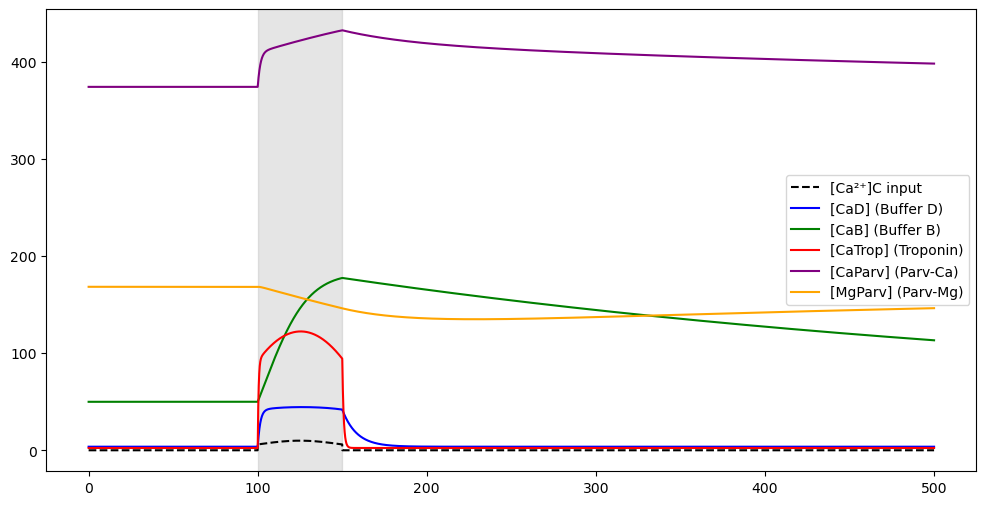

In [14]:
# Parameters for the calcium binding model
params = {
    # Buffer D (Rhod-2)
    'konD': 0.09,     # μM⁻¹·ms⁻¹
    'koffD': 0.11,    # ms⁻¹
    'D_TOT': 50,     # μM
    
    # Buffer B
    'konB': 0.005, # EGTA
    'koffB': 0.0015,  # ms⁻¹
    'B_TOT': 200,    # μM   
    
    # Troponin
    'konT': 0.125,    # 肌钙蛋白
    'koffT': 1.2,
    'Trop_TOT': 240, 
    
    # Parvalbumin
    'konCa': 0.1,     # μM⁻¹·ms⁻¹
    'koffCa': 0.001,  # ms⁻¹
    'konMg': 1.5e-5,
    'koffMg': 0.003,
    'Parv_TOT': 580,
    'Mg': 900,       # μM

    'Ca_rest': 0.1    # μM
}

# 微分方程系统
def dy_dt(y, t, Ca_func, params):
    CaD, CaB, CaTrop, CaParv, MgParv = y
    Ca_C = Ca_func(t)
    
    free_D = max(0, params['D_TOT'] - CaD)
    free_B = max(0, params['B_TOT'] - CaB)
    free_Parv = max(0, params['Parv_TOT'] - CaParv - MgParv)
    
    dCaD = params['konD'] * Ca_C * free_D - params['koffD'] * CaD
    dCaB = params['konB'] * Ca_C * free_B - params['koffB'] * CaB
    dCaTrop = params['konT'] * Ca_C * (params['Trop_TOT'] - CaTrop) - params['koffT'] * CaTrop
    dCaParv = params['konCa'] * Ca_C * free_Parv - params['koffCa'] * CaParv
    dMgParv = params['konMg'] * params['Mg'] * free_Parv - params['koffMg'] * MgParv
    
    return [dCaD, dCaB, dCaTrop, dCaParv, dMgParv]

def Ca_input(t):
    return np.where(t < 100, params['Ca_rest'],
                   np.where(t > 150, params['Ca_rest'],
                           0.1 + 9.9 * np.exp(-0.5*((t-125)/25)**2)))

# 计算初始条件
Ca_rest = params['Ca_rest']
y0 = [
    (params['konD'] * Ca_rest * params['D_TOT']) / (params['konD'] * Ca_rest + params['koffD']),
    (params['konB'] * Ca_rest * params['B_TOT']) / (params['konB'] * Ca_rest + params['koffB']),
    (params['konT'] * Ca_rest * params['Trop_TOT']) / (params['konT'] * Ca_rest + params['koffT']),
    (params['konCa'] * Ca_rest / params['koffCa']) * (params['Parv_TOT'] / (1 + (params['konCa']*Ca_rest/params['koffCa']) + (params['konMg']*params['Mg']/params['koffMg']))),
    (params['konMg'] * params['Mg'] / params['koffMg']) * (params['Parv_TOT'] / (1 + (params['konCa']*Ca_rest/params['koffCa']) + (params['konMg']*params['Mg']/params['koffMg'])))
]

# 模拟运行
t = np.linspace(0, 500, 10000)
sol = odeint(dy_dt, y0, t, args=(Ca_input, params))
CaD, CaB, CaTrop, CaParv, MgParv = sol.T

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(t, Ca_input(t), 'k--', label='[Ca²⁺]C input')
plt.plot(t, CaD, label='[CaD] (Buffer D)', color='blue', linewidth=1.5)
plt.plot(t, CaB, label='[CaB] (Buffer B)', color='green', linewidth=1.5)
plt.plot(t, CaTrop, label='[CaTrop] (Troponin)', color='red', linewidth=1.5)
plt.plot(t, CaParv, label='[CaParv] (Parv-Ca)', color='purple', linewidth=1.5)
plt.plot(t, MgParv, label='[MgParv] (Parv-Mg)', color='orange', linewidth=1.5, linestyle='-')
plt.axvspan(100, 150, color='gray', alpha=0.2)
plt.legend()
plt.show()


### Impact on Calcium Dynamics

If we don't consider the initial physiological resting conditions, then we can see the impact of the different parameters on the calcium dynamics. The following code shows the impact of the different parameters on the calcium dynamics. The parameters are set to their default values, and then we can change them one by one to observe how they affect the calcium dynamics.


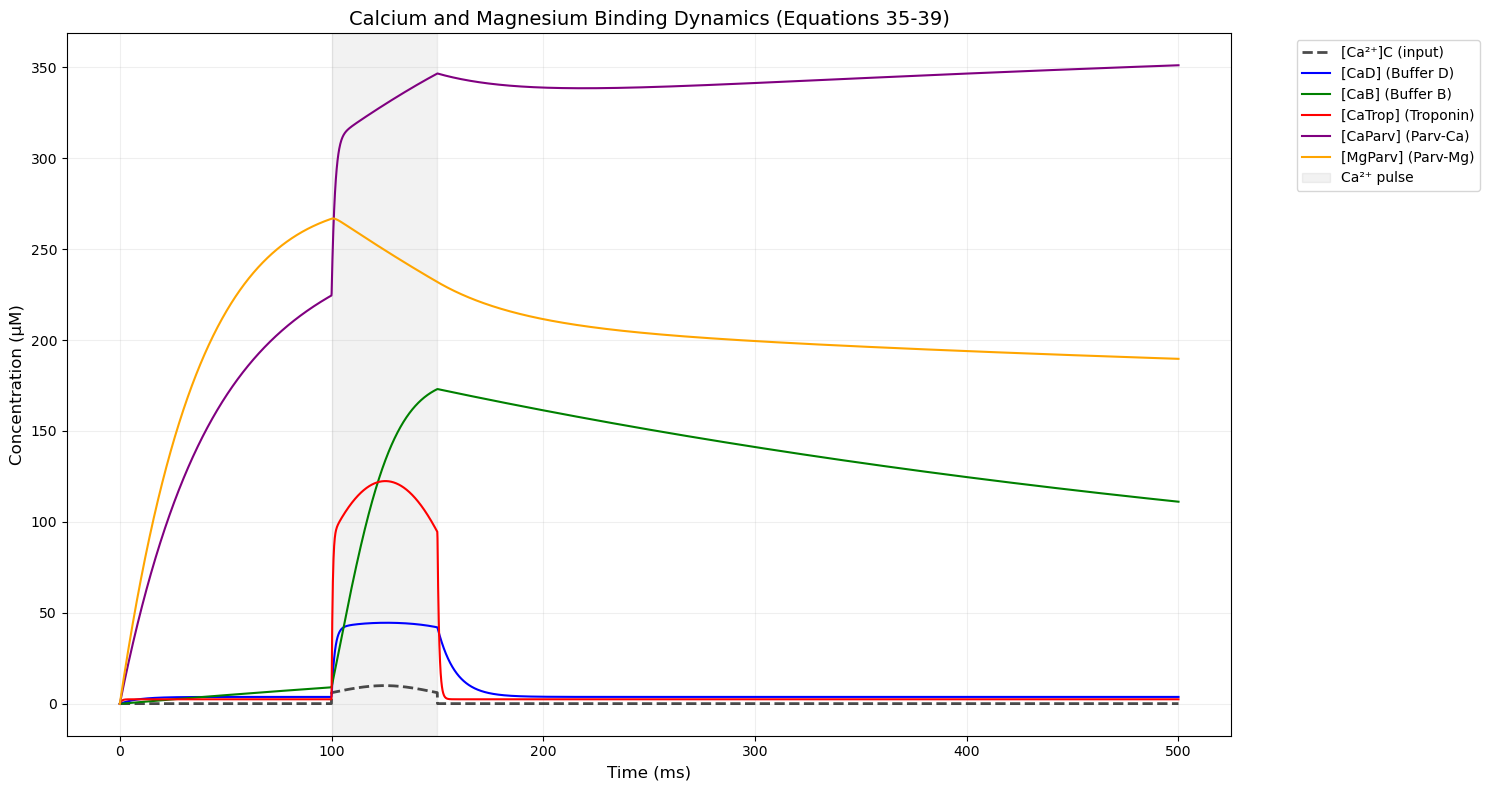

In [15]:
# Parameters for the calcium binding model
params = {
    # Buffer D (Rhod-2)
    'konD': 0.09,     # μM⁻¹·ms⁻¹
    'koffD': 0.11,    # ms⁻¹
    'D_TOT': 50,     # μM
    
    # Buffer B
    'konB': 0.005, # EGTA
    'koffB': 0.0015,  # ms⁻¹
    'B_TOT': 200,    # μM   
    
    # Troponin
    'konT': 0.125,    # 肌钙蛋白
    'koffT': 1.2,
    'Trop_TOT': 240, 
    
    # Parvalbumin
    'konCa': 0.1,     # μM⁻¹·ms⁻¹
    'koffCa': 0.001,  # ms⁻¹
    'konMg': 1.5e-5,
    'koffMg': 0.003,
    'Parv_TOT': 580,
    'Mg': 900,       # μM

    'Ca_rest': 0.1    # μM

}

# 微分方程系统
def dy_dt(y, t, Ca_func, params):
    CaD, CaB, CaTrop, CaParv, MgParv = y
    
    # 获取当前[Ca²⁺]C (从外部函数)
    Ca_C = Ca_func(t)
    
    # 计算free Parvalbumin (确保非负)
    free_Parv = max(0, params['Parv_TOT'] - CaParv - MgParv)
    
    # d[CaD]/dt
    dCaD = params['konD'] * Ca_C * (params['D_TOT'] - CaD) - params['koffD'] * CaD
    
    # d[CaB]/dt
    dCaB = params['konB'] * Ca_C * (params['B_TOT'] - CaB) - params['koffB'] * CaB
    
    # d[CaTrop]/dt
    dCaTrop = params['konT'] * Ca_C * (params['Trop_TOT'] - CaTrop) - params['koffT'] * CaTrop
    
    # d[CaParv]/dt
    dCaParv = params['konCa'] * Ca_C * free_Parv - params['koffCa'] * CaParv
    
    # d[MgParv]/dt
    dMgParv = params['konMg'] * params['Mg'] * free_Parv - params['koffMg'] * MgParv
    
    return [dCaD, dCaB, dCaTrop, dCaParv, dMgParv]

# 定义钙输入函数 (高斯脉冲)
def Ca_input(t):
    return np.where(t < 100, params['Ca_rest'],
                   np.where(t > 150, params['Ca_rest'],
                           0.1 + 9.9 * np.exp(-0.5*((t-125)/25)**2)))

# 时间数组
t = np.linspace(0, 500, 5000)  # 0-500ms, 5000点

# 初始条件 [CaD, CaB, CaTrop, CaParv, MgParv]
y0 = [0, 0, 0, 0, 0]

# 使用ODEINT求解 (自动处理数值稳定性)
sol = odeint(dy_dt, y0, t, args=(Ca_input, params))
CaD, CaB, CaTrop, CaParv, MgParv = sol.T

# 绘图
plt.figure(figsize=(15, 8))

# 绘制输入钙信号
plt.plot(t, Ca_input(t), 'k--', label='[Ca²⁺]C (input)', linewidth=2, alpha=0.7)

# 绘制所有钙结合物种
plt.plot(t, CaD, label='[CaD] (Buffer D)', color='blue', linewidth=1.5)
plt.plot(t, CaB, label='[CaB] (Buffer B)', color='green', linewidth=1.5)
plt.plot(t, CaTrop, label='[CaTrop] (Troponin)', color='red', linewidth=1.5)
plt.plot(t, CaParv, label='[CaParv] (Parv-Ca)', color='purple', linewidth=1.5)
plt.plot(t, MgParv, label='[MgParv] (Parv-Mg)', color='orange', linewidth=1.5, linestyle='-')

# 标记钙脉冲区域
plt.axvspan(100, 150, color='gray', alpha=0.1, label='Ca²⁺ pulse')

# 图例和标签
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Concentration (μM)', fontsize=12)
plt.title('Calcium and Magnesium Binding Dynamics (Equations 35-39)', fontsize=14)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()


The rate of change in the total cytoplasmic Ca concentration is the sum of all the changing rates of the bound Ca plus changing rate of the cytoplasmic [Ca²⁺]:

$$
\frac{d[\mathrm{Ca}]_C^{\mathrm{TOT}}}{dt} = \frac{d[\mathrm{Ca}^{2+}]_C}{dt} + \frac{d[\mathrm{CaD}]}{dt} + \frac{d[\mathrm{CaB}]}{dt} + \frac{d[\mathrm{CaTrop}]}{dt} + \frac{d[\mathrm{CaParv}]}{dt} \tag{27}
$$

Also, the rate of change in the total cytoplasmic Ca concentration is the balance of the fluxes into the cytoplasm from the SR (release and leak fluxes), and to the SR from the cytoplasm (pump flux):

$$
\frac{d[\mathrm{Ca}]_C^{\mathrm{TOT}}}{dt} = R + L - PF \tag{28}
$$

Substituting equation (28) into equation (27) and solving the rate of change of the free Ca²⁺ concentration in the cytoplasm yields:

$$
\frac{d[\mathrm{Ca}^{2+}]_C}{dt} = R + L - PF - \frac{d[\mathrm{CaD}]}{dt} - \frac{d[\mathrm{CaB}]}{dt} - \frac{d[\mathrm{CaTrop}]}{dt} - \frac{d[\mathrm{CaParv}]}{dt} \tag{29}
$$

This calculates the rate of change of the [Ca²⁺] in the cytoplasm.

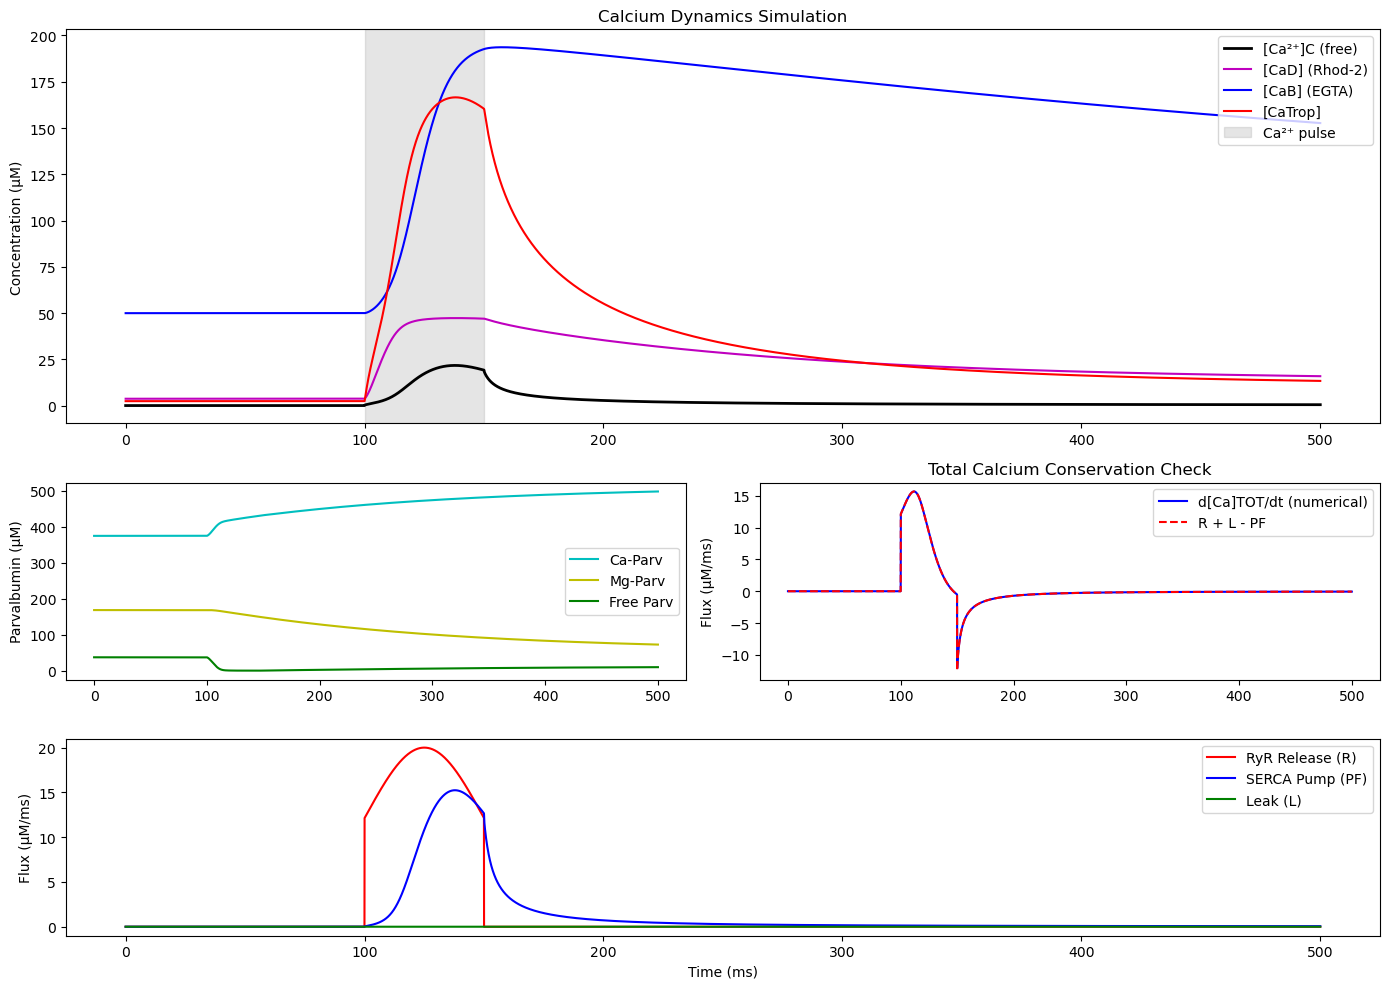

In [ ]:
# ======================
# 参数配置
# ======================
params = {
    # 钙输入参数 (单位: μM/ms)
    'R': lambda t: 20 * np.exp(-0.5*((t-125)/25)**2) if 100 < t < 150 else 0,  # RyR受体释放
    'L': 0.005,                                   # 肌质网漏电流
    'PF': lambda CaC: 0.15 * CaC**1.5,           # SERCA泵（非线性）
    
    # 缓冲系统参数
    # Buffer D (Rhod-2)
    'konD': 0.09,     # μM⁻¹·ms⁻¹
    'koffD': 0.11,    # ms⁻¹
    'D_TOT': 50,     # μM
    
    # Buffer B
    'konB': 0.005, # EGTA
    'koffB': 0.0015,  # ms⁻¹
    'B_TOT': 200,    # μM   
    
    # Troponin
    'konT': 0.125,    # 肌钙蛋白
    'koffT': 1.2,
    'Trop_TOT': 240, 
    
    # Parvalbumin
    'konCa': 0.1,     # μM⁻¹·ms⁻¹
    'koffCa': 0.001,  # ms⁻¹
    'konMg': 1.5e-5,
    'koffMg': 0.003,
    'Parv_TOT': 580,
    'Mg': 900,       # μM

    'Ca_rest': 0.1    # μM
}

# ======================
# 微分方程系统
# ======================
def dy_dt(y, t, params):
    CaC, CaD, CaB, CaTrop, CaParv, MgParv = y
    
    # 计算各缓冲剂结合速率 (方程35-39)
    dCaD = params['konD'] * CaC * (params['D_TOT'] - CaD) - params['koffD'] * CaD
    dCaB = params['konB'] * CaC * (params['B_TOT'] - CaB) - params['koffB'] * CaB
    dCaTrop = params['konT'] * CaC * (params['Trop_TOT'] - CaTrop) - params['koffT'] * CaTrop
    free_Parv = max(0, params['Parv_TOT'] - CaParv - MgParv)  # 确保非负
    dCaParv = params['konCa'] * CaC * free_Parv - params['koffCa'] * CaParv
    dMgParv = params['konMg'] * params['Mg'] * free_Parv - params['koffMg'] * MgParv
    
    # 计算游离钙变化 (方程42)
    R_val = params['R'](t) if callable(params['R']) else params['R']
    PF_val = params['PF'](CaC) if callable(params['PF']) else params['PF']
    dCaC = R_val + params['L'] - PF_val - dCaD - dCaB - dCaTrop - dCaParv
    
    return [dCaC, dCaD, dCaB, dCaTrop, dCaParv, dMgParv]

# ======================
# 初始条件计算
# ======================
def initial_conditions(params):
    Ca = params['Ca_rest']
    
    # 计算各缓冲剂稳态
    CaD_0 = (params['konD'] * Ca * params['D_TOT']) / (params['konD'] * Ca + params['koffD'])
    CaB_0 = (params['konB'] * Ca * params['B_TOT']) / (params['konB'] * Ca + params['koffB'])
    CaTrop_0 = (params['konT'] * Ca * params['Trop_TOT']) / (params['konT'] * Ca + params['koffT'])
    
    # 小清蛋白分配 (Ca/Mg竞争)
    denom = 1 + (params['konCa']*Ca/params['koffCa']) + (params['konMg']*params['Mg']/params['koffMg'])
    free_Parv_0 = params['Parv_TOT'] / denom
    CaParv_0 = (params['konCa'] * Ca / params['koffCa']) * free_Parv_0
    MgParv_0 = (params['konMg'] * params['Mg'] / params['koffMg']) * free_Parv_0
    
    return [Ca, CaD_0, CaB_0, CaTrop_0, CaParv_0, MgParv_0]

# ======================
# 模拟运行
# ======================
t = np.linspace(0, 500, 10000)  # 时间网格 (0-500ms)
y0 = initial_conditions(params)
sol = odeint(dy_dt, y0, t, args=(params,))
CaC, CaD, CaB, CaTrop, CaParv, MgParv = sol.T

# 计算总钙 (验证方程40-41)
Ca_total = CaC + CaD + CaB + CaTrop + CaParv
dCa_total = np.gradient(Ca_total, t[1]-t[0])  # 数值微分

# ======================
# 可视化
# ======================
plt.figure(figsize=(14, 10))
gs = GridSpec(3, 2, height_ratios=[2, 1, 1])

# 主图：钙动力学
ax1 = plt.subplot(gs[0, :])
ax1.plot(t, CaC, 'k', label='[Ca²⁺]C (free)', linewidth=2)
ax1.plot(t, CaD, 'm', label='[CaD] (Rhod-2)')
ax1.plot(t, CaB, 'b', label='[CaB] (EGTA)')
ax1.plot(t, CaTrop, 'r', label='[CaTrop]')
ax1.axvspan(100, 150, color='gray', alpha=0.2, label='Ca²⁺ pulse')
ax1.set_ylabel('Concentration (μM)')
ax1.legend(loc='upper right')
ax1.set_title('Calcium Dynamics Simulation')

# 小清蛋白状态
ax2 = plt.subplot(gs[1, 0])
ax2.plot(t, CaParv, 'c', label='Ca-Parv')
ax2.plot(t, MgParv, 'y', label='Mg-Parv')
ax2.plot(t, params['Parv_TOT'] - CaParv - MgParv, 'g', label='Free Parv')
ax2.set_ylabel('Parvalbumin (μM)')
ax2.legend()

# 总量验证
ax3 = plt.subplot(gs[1, 1])
ax3.plot(t, dCa_total, 'b', label='d[Ca]TOT/dt (numerical)')
R_vals = np.array([params['R'](ti) for ti in t])
PF_vals = np.array([params['PF'](CaC[i]) for i in range(len(t))])
ax3.plot(t, R_vals + params['L'] - PF_vals, 'r--', label='R + L - PF')
ax3.set_ylabel('Flux (μM/ms)')
ax3.legend()
ax3.set_title('Total Calcium Conservation Check')

# 输入信号
ax4 = plt.subplot(gs[2, :])
ax4.plot(t, R_vals, 'r', label='RyR Release (R)')
ax4.plot(t, PF_vals, 'b', label='SERCA Pump (PF)')
ax4.plot(t, [params['L']]*len(t), 'g', label='Leak (L)')
ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('Flux (μM/ms)')
ax4.legend()

plt.tight_layout()
plt.show()


### Numerical Simulation

According to Fig 1, the parameters are fit to the experiment, and EGTA is the main buffer, while Parvalbumin and Troponin are physiological buffers.

The following code displays the simulation of the calcium dynamics in the cytoplasm and SR. The parameters are set to their default values, and then we can change them one by one to observe how they affect the calcium dynamics.

In order to reduce noise in the simulations, we approximate the experimental $p(t)$ with the function:

$$
p(t) = p_{\text{max}} \left\{(1-\exp(-t/\tau_1))^N \left[(1-b) \exp(-t/\tau_2) + b\right]\right\} \exp(-t/\tau_3). \tag{30}
$$

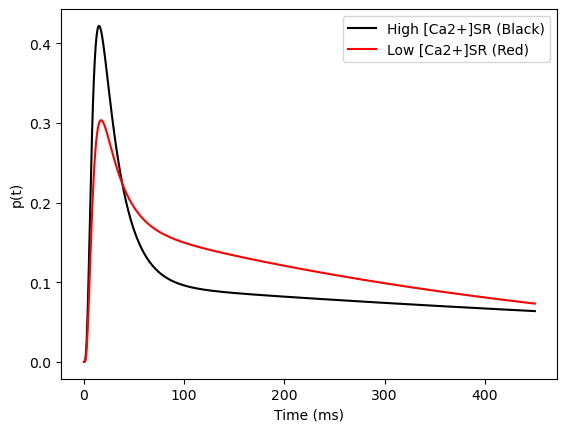

In [17]:
def p(t, pmax, tau1, N, b, tau2, tau3):
    activation = (1 - np.exp(-t/tau1))**N
    fast_decay = (1 - b) * np.exp(-t/tau2) + b
    slow_decay = np.exp(-t/tau3)
    return pmax * activation * fast_decay * slow_decay

t = np.linspace(0, 450, 1000)  # 实验脉冲450ms
params_highSR = {'pmax': 1.0, 'tau1': 5, 'N': 4, 'b': 0.1, 'tau2': 20, 'tau3': 1000}  # 高[Ca2+]SR
params_lowSR = {'pmax': 0.6, 'tau1': 5, 'N': 4, 'b': 0.3, 'tau2': 20, 'tau3': 500}    # 低[Ca2+]SR

plt.plot(t, p(t, **params_highSR), 'k-', label='High [Ca2+]SR (Black)')
plt.plot(t, p(t, **params_lowSR), 'r-', label='Low [Ca2+]SR (Red)')
plt.xlabel('Time (ms)')
plt.ylabel('p(t)')
plt.legend()
plt.show()


### Adjusting Parameters

According to the original paper, the parameter values here still need adjustment based on experimental data so as to optimize the stability and reliability of the model. Below is a simple example.

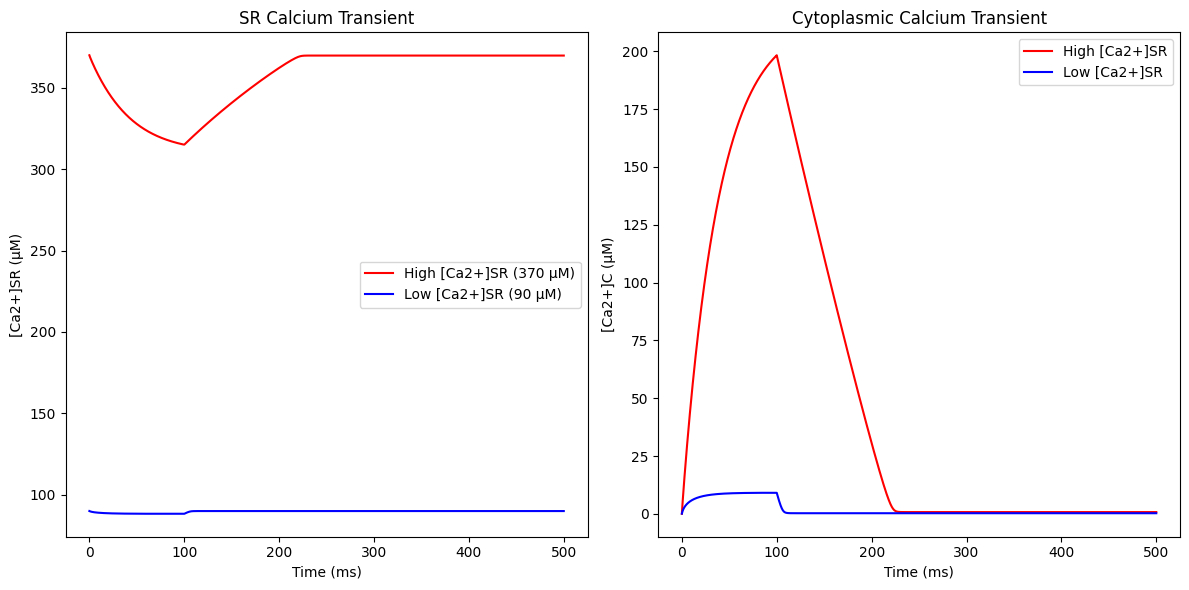

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置（单位：μM, ms）
class Parameters:
    def __init__(self):
        # 通用参数
        self.Vc = 1.0      # 细胞质体积 (相对值)
        self.Vsr = 0.1     # SR体积 (V_SR/V_C = 0.1)
        self.alpha = self.Vc / self.Vsr
        
        # 高[Ca2+]SR参数 (来自论文表2)
        self.high_CaSR = {
            'CSQ_TOT': 32400,   # μM (SR体积)
            'K_CSQ': 613,       # μM
            'n': 3.24,          # Hill系数
            'F_TOT': 200,       # μM (染料Mag Fluo4)
            'K_F': 90,          # μM
            'rest_CaSR': 370,   # 初始[Ca2+]SR (μM)
            'rest_CaC': 0.03    # 初始[Ca2+]C (μM)
        }
        
        # 低[Ca2+]SR参数
        self.low_CaSR = {
            'CSQ_TOT': 18600,
            'K_CSQ': 221,
            'n': 1.86,
            'F_TOT': 200,
            'K_F': 90,
            'rest_CaSR': 90,
            'rest_CaC': 0.1
        }
        
        # 钙泵和泄漏
        self.MPF = 1.95       # 最大泵通量 (μM/ms)
        self.Kp = 1.0         # 泵的Kd (μM)
        self.L = self.MPF * (self.high_CaSR['rest_CaC'] / (self.Kp + self.high_CaSR['rest_CaC']))**2  # 泄漏通量
        
        # 时间参数
        self.dt = 0.02        # 时间步长 (ms)
        self.t_total = 500    # 总模拟时间 (ms)
        self.steps = int(self.t_total / self.dt)

# 钙缓冲方程
def Ca_buffering(Ca_SR, params, condition):
    """计算SR内钙缓冲（CSQ和染料）"""
    if condition == 'high':
        CSQ_TOT = params.high_CaSR['CSQ_TOT']
        K_CSQ = params.high_CaSR['K_CSQ']
        n = params.high_CaSR['n']
        F_TOT = params.high_CaSR['F_TOT']
        K_F = params.high_CaSR['K_F']
    else:
        CSQ_TOT = params.low_CaSR['CSQ_TOT']
        K_CSQ = params.low_CaSR['K_CSQ']
        n = params.low_CaSR['n']
        F_TOT = params.low_CaSR['F_TOT']
        K_F = params.low_CaSR['K_F']
    
    # CSQ缓冲（Hill方程）
    CaCSQ = CSQ_TOT * (Ca_SR**n) / (K_CSQ**n + Ca_SR**n)
    E_CSQ = n * CSQ_TOT * (K_CSQ**n) * (Ca_SR**(n-1)) / (K_CSQ**n + Ca_SR**n)**2
    
    # 染料缓冲（Langmuir方程）
    CaF = F_TOT * Ca_SR / (K_F + Ca_SR)
    E_F = F_TOT * K_F / (K_F + Ca_SR)**2
    
    return CaCSQ, E_CSQ, CaF, E_F

# 钙泵通量（SERCA）
def pump_flux(Ca_C, params):
    return params.MPF * (Ca_C / (params.Kp + Ca_C))**2

# 钙释放通量（RyR）
def release_flux(p, Ca_SR, Ca_C):
    return p * (Ca_SR - Ca_C)

# 模拟钙瞬态
def simulate_Ca_transient(params, condition):
    # 初始化数组
    time = np.arange(0, params.t_total, params.dt)
    Ca_SR = np.zeros_like(time)
    Ca_C = np.zeros_like(time)
    
    # 初始条件
    if condition == 'high':
        Ca_SR[0] = params.high_CaSR['rest_CaSR']
        Ca_C[0] = params.high_CaSR['rest_CaC']
    else:
        Ca_SR[0] = params.low_CaSR['rest_CaSR']
        Ca_C[0] = params.low_CaSR['rest_CaC']
    
    # 模拟时间过程
    for i in range(1, len(time)):
        # 电压脉冲激活的SR通透性p(t)（简化：阶跃函数）
        if time[i] < 100:  # 脉冲持续100ms
            p = 0.02       # 激活的通透性 (μM/ms)
        else:
            p = 0.001      # 静息通透性
        
        # 计算缓冲和通量
        CaCSQ, E_CSQ, CaF, E_F = Ca_buffering(Ca_SR[i-1], params, condition)
        PF = pump_flux(Ca_C[i-1], params)
        R = release_flux(p, Ca_SR[i-1], Ca_C[i-1])
        
        # SR钙动态（方程33-34）
        dCa_SRTOT_dt = (-R - params.L + PF) * params.alpha
        dCa_SR_dt = dCa_SRTOT_dt / (1 + E_CSQ + E_F)
        Ca_SR[i] = Ca_SR[i-1] + dCa_SR_dt * params.dt
        
        # 细胞质钙动态（方程42）
        dCa_C_dt = (R + params.L - PF)  # 简化：忽略细胞质缓冲
        Ca_C[i] = Ca_C[i-1] + dCa_C_dt * params.dt
    
    return time, Ca_SR, Ca_C

# 运行模拟
params = Parameters()
time_high, Ca_SR_high, Ca_C_high = simulate_Ca_transient(params, 'high')
time_low, Ca_SR_low, Ca_C_low = simulate_Ca_transient(params, 'low')

# 可视化结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time_high, Ca_SR_high, 'r', label='High [Ca2+]SR (370 μM)')
plt.plot(time_low, Ca_SR_low, 'b', label='Low [Ca2+]SR (90 μM)')
plt.xlabel('Time (ms)')
plt.ylabel('[Ca2+]SR (μM)')
plt.title('SR Calcium Transient')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_high, Ca_C_high, 'r', label='High [Ca2+]SR')
plt.plot(time_low, Ca_C_low, 'b', label='Low [Ca2+]SR')
plt.xlabel('Time (ms)')
plt.ylabel('[Ca2+]C (μM)')
plt.title('Cytoplasmic Calcium Transient')
plt.legend()

plt.tight_layout()
plt.show()


Fig 2 shows the relationship between the SR calcium release flux (RyR channel), the calcium uptake flux of the SERCA pump, and the changes in the calcium binding state within the SR that are obtained through **fitting experimental curves**.

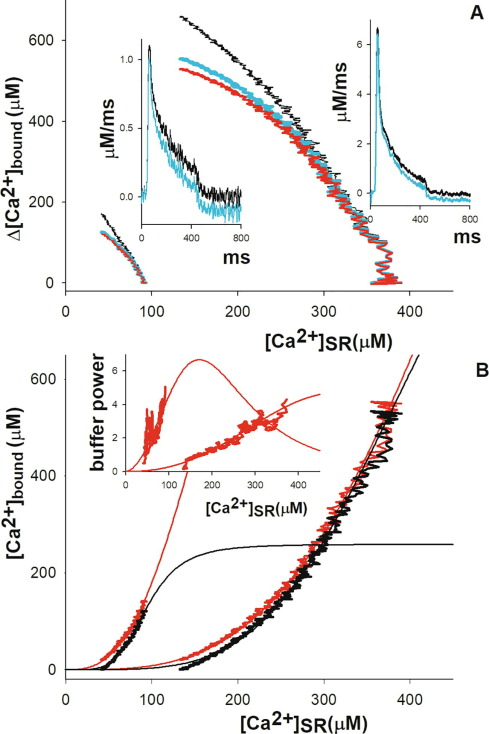

Fig 3 validates through **theoretical simulations** how the experimentally measured SR calcium permeability (p(t)) and the calcium binding protein (CSQ) parameters together drive the SR and cytosolic calcium transients.

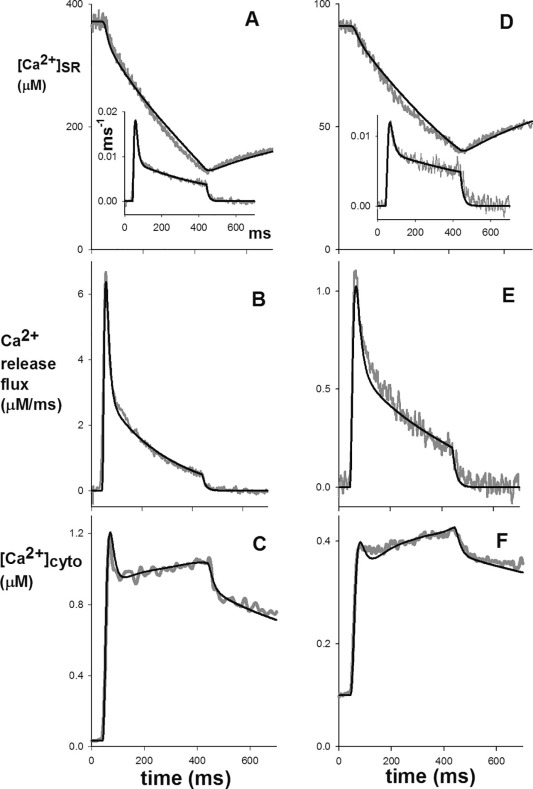

Fig 4 compares experimental data and simulation results, revealing that the $\mathrm{CSQ}$ parameters fit under high $\left[\mathrm{Ca}^{2+}\right]_{\mathrm{SR}}$ conditions cannot be directly applied to low $\left[\mathrm{Ca}^{2+}\right]_{\mathrm{SR}}$ conditions.

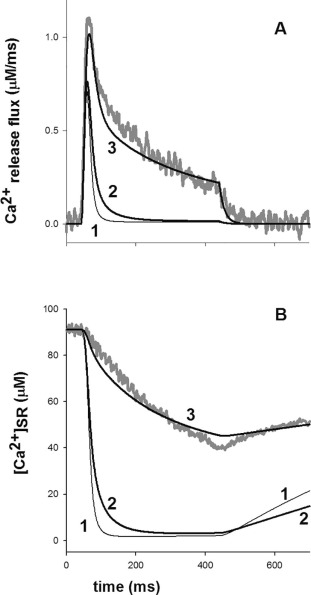

Fig 5 compares the Hill equation fitting results for $\mathrm{CaB}_{\mathrm{min}} = 0$ and $\mathrm{CaB}_{\mathrm{min}} \neq 0$, highlighting the critical impact of SR calcium-binding protein (CSQ) buffering capacity in the low $\left[\mathrm{Ca}^{2+}\right]_{\mathrm{SR}}$ range on dynamic simulations. The model requires the introduction of $\mathrm{CaB}_{\mathrm{min}}$ and a multi-buffer system.

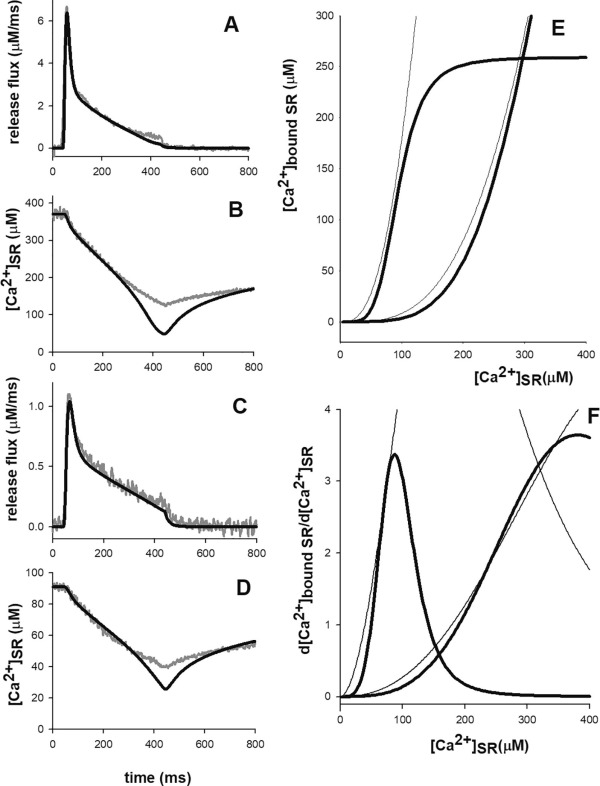

Fig 6 simplifies the dynamic description of calcium buffering within the SR by a linear approximation and validates the applicability of this simplification in simulating SR calcium transients and release fluxes.

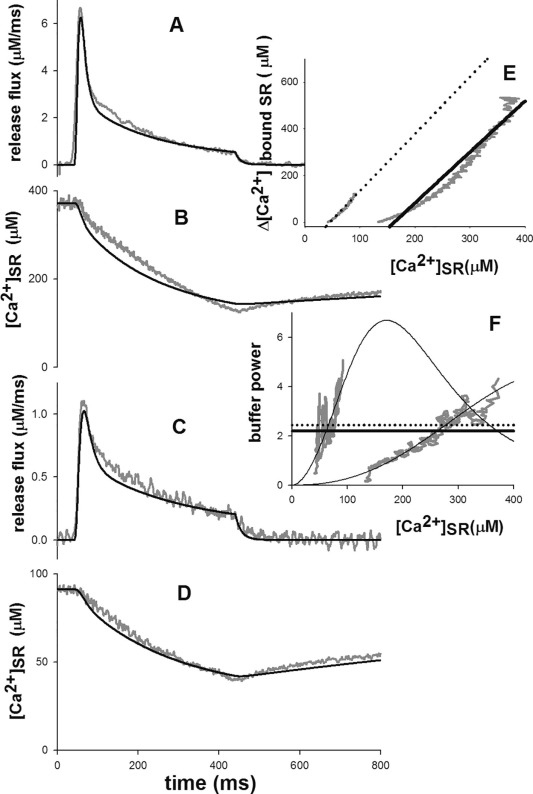

The model with $\mathrm{CaB}_{\mathrm{min}}$ and a multi-buffer system is more accurate in simulating the calcium dynamics in the low $\left[\mathrm{Ca}^{2+}\right]_{\mathrm{SR}}$ range, while the model with $\mathrm{CaB}_{\mathrm{min}} = 0$ and a single buffer system is less accurate in simulating the calcium dynamics in the low $\left[\mathrm{Ca}^{2+}\right]_{\mathrm{SR}}$ range.

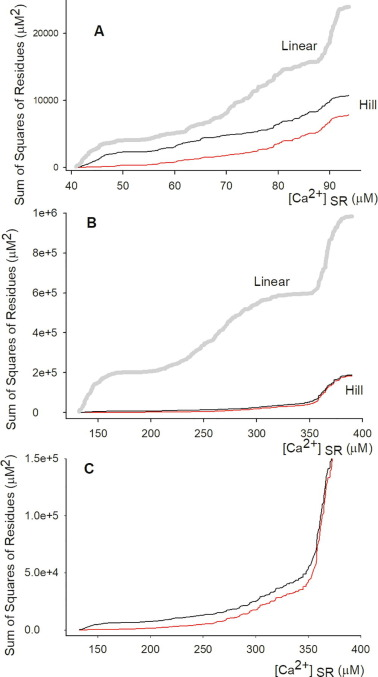

Comparing these two situations, we can learn that the model with $\mathrm{CaB}_{\mathrm{min}}$ and a multi-buffer system is more accurate in simulating the calcium dynamics in the low $\left[\mathrm{Ca}^{2+}\right]_{\mathrm{SR}}$ range. Additionally, further analyses are needed to explore the implications of varying $\mathrm{CaB}_{\mathrm{min}}$ values on the overall calcium dynamics. The effects of temperature and pH on calcium dynamics should also be considered in future works.

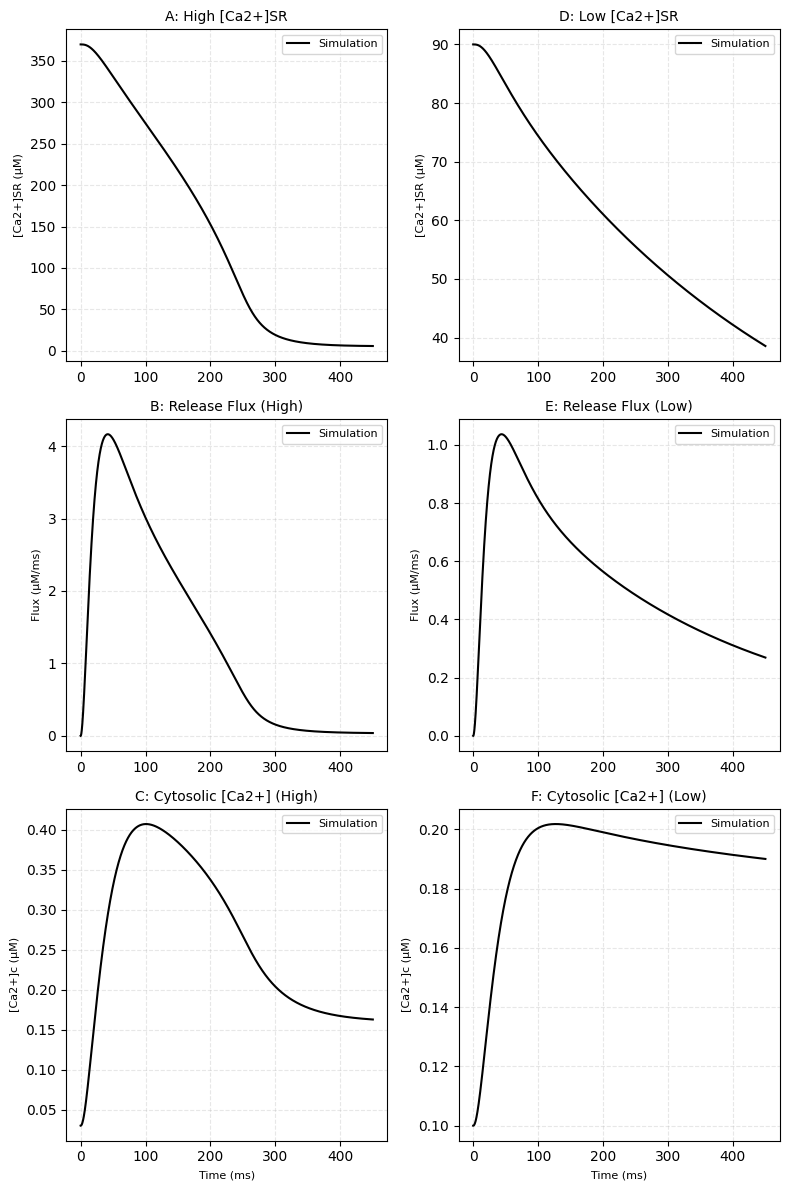

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 参数定义（基于文献表2和正文描述）
params = {
    # 体积和几何参数
    'V_SR': 1.0,       # SR体积（相对值）
    'V_c': 10.0,       # 细胞质体积（相对值）
    'alpha': 10.0,     # V_c / V_SR
    
    # SR内缓冲（肌集钙蛋白CSQ） - 高[Ca2+]SR条件
    'CSQ_TOT_high': 32400,  # 高[Ca2+]SR时的总CSQ浓度 (μM)
    'K_CSQ_high': 613,      # 高[Ca2+]SR时的半饱和浓度 (μM)
    'n_high': 3.24,         # 高[Ca2+]SR时的Hill系数
    
    # SR内缓冲（肌集钙蛋白CSQ） - 低[Ca2+]SR条件
    'CSQ_TOT_low': 18600,   # 低[Ca2+]SR时的总CSQ浓度 (μM)
    'K_CSQ_low': 221,       # 低[Ca2+]SR时的半饱和浓度 (μM)
    'n_low': 1.86,          # 低[Ca2+]SR时的Hill系数
    
    # SR内染料（MagFluo4）
    'F_TOT': 200,      # SR内染料总浓度 (μM)
    'K_F': 90,         # 染料的解离常数 (μM)
    
    # 细胞质缓冲（EGTA）
    'B_TOT_high': 2000,     # 高[Ca2+]SR时的EGTA总浓度 (μM)
    'B_TOT_low': 2200,      # 低[Ca2+]SR时的EGTA总浓度 (μM)
    'k_on_B': 0.005,   # EGTA结合速率 (μM⁻¹·ms⁻¹)
    'k_off_B': 0.0015, # EGTA解离速率 (ms⁻¹)
    
    # 肌钙蛋白
    'Trop_TOT': 240,   # 肌钙蛋白总浓度 (μM)
    'k_on_T': 0.125,   # 肌钙蛋白结合速率 (μM⁻¹·ms⁻¹)
    'k_off_T': 1.2,    # 肌钙蛋白解离速率 (ms⁻¹)
    
    # 小白蛋白
    'Parv_TOT_high': 580,   # 高[Ca2+]SR时的小白蛋白总浓度 (μM)
    'Parv_TOT_low': 230,    # 低[Ca2+]SR时的小白蛋白总浓度 (μM)
    'Mg': 900,         # 细胞质Mg²⁺浓度 (μM)
    'k_on_Mg': 1.5e-5, # Mg²⁺结合速率 (μM⁻¹·ms⁻¹)
    'k_off_Mg': 0.003, # Mg²⁺解离速率 (ms⁻¹)
    'k_on_Ca_Parv': 0.1,   # Ca²⁺结合小白蛋白速率 (μM⁻¹·ms⁻¹)
    'k_off_Ca_Parv': 0.001,# Ca²⁺解离小白蛋白速率 (ms⁻¹),
    
    # 泵和漏流
    'MPF': 1.95,       # 最大泵通量 (μM·ms⁻¹)
    'K_P': 1.0,        # 泵的解离常数 (μM),
    
    # 初始条件 - 高[Ca2+]SR
    'Ca_SR0_high': 370,  # 高初始[Ca2+]SR (μM)
    'Ca_c0_high': 0.03,  # 高初始[Ca2+]c (μM),
    
    # 初始条件 - 低[Ca2+]SR
    'Ca_SR0_low': 90,    # 低初始[Ca2+]SR (μM)
    'Ca_c0_low': 0.1,    # 低初始[Ca2+]c (μM),
    
    # 染料参数
    'D_TOT_high': 250,  # 高[Ca2+]SR时的Rhod2浓度 (μM)
    'D_TOT_low': 380,   # 低[Ca2+]SR时的Rhod2浓度 (μM)
    'k_on_D': 0.09,     # Rhod2结合速率 (μM⁻¹·ms⁻¹)
    'k_off_D': 0.11,    # Rhod2解离速率 (ms⁻¹),
    
    # 通透性时间曲线参数（方程43）
    'p_max': 0.023,    # 最大通透性 (ms⁻¹)
    'tau1': 17,        # 上升时间常数 (ms)
    'tau2': 38,        # 快速衰减时间常数 (ms)
    'tau3': 909,       # 慢速衰减时间常数 (ms)
    'N': 2,            # 指数幂次
    'b': 0.5           # 权重系数
}

# 定义SR通透性时间曲线 p(t)（基于文献方程43）
def p_time_course(t, p_max, tau1, tau2, tau3, N, b):
    """实验测定的SR通透性时间曲线"""
    term1 = (1 - np.exp(-t/tau1))**N
    term2 = (1 - b) * np.exp(-t/tau2) + b
    term3 = np.exp(-t/tau3)
    return p_max * term1 * term2 * term3

# 定义SR缓冲能力（Hill方程导数）
def E_CSQ(Ca_SR, CSQ_TOT, K_CSQ, n):
    """SR内CSQ的缓冲能力"""
    numerator = n * CSQ_TOT * (K_CSQ**n) * (Ca_SR**(n-1))
    denominator = (K_CSQ**n + Ca_SR**n)**2
    return numerator / denominator

def E_F(Ca_SR, F_TOT, K_F):
    """SR内染料的缓冲能力"""
    return F_TOT * K_F / (K_F + Ca_SR)**2

# 计算初始结合形式的浓度
def calculate_initial_conditions(params, condition):
    if condition == 'high':
        Ca_c0 = params['Ca_c0_high']
        B_TOT = params['B_TOT_high']
        Parv_TOT = params['Parv_TOT_high']
        D_TOT = params['D_TOT_high']
    else:
        Ca_c0 = params['Ca_c0_low']
        B_TOT = params['B_TOT_low']
        Parv_TOT = params['Parv_TOT_low']
        D_TOT = params['D_TOT_low']
    
    # CaD (Rhod2染料)
    K_d_D = params['k_off_D'] / params['k_on_D']
    CaD_0 = D_TOT * Ca_c0 / (K_d_D + Ca_c0)
    
    # CaB (EGTA)
    K_d_B = params['k_off_B'] / params['k_on_B']
    CaB_0 = B_TOT * Ca_c0 / (K_d_B + Ca_c0)
    
    # CaTrop (肌钙蛋白)
    K_d_T = params['k_off_T'] / params['k_on_T']
    CaTrop_0 = params['Trop_TOT'] * Ca_c0 / (K_d_T + Ca_c0)
    
    # Parvalbumin (小白蛋白)
    K_d_Ca = params['k_off_Ca_Parv'] / params['k_on_Ca_Parv']
    K_d_Mg = params['k_off_Mg'] / params['k_on_Mg']
    K_Ca = K_d_Ca * (1 + params['Mg'] / K_d_Mg)
    K_Mg = K_d_Mg * (1 + Ca_c0 / K_d_Ca)
    CaParv_0 = Parv_TOT * Ca_c0 / (K_Ca + Ca_c0)
    MgParv_0 = Parv_TOT * params['Mg'] / (K_Mg + params['Mg'])
    
    return CaD_0, CaB_0, CaTrop_0, CaParv_0, MgParv_0

# 定义微分方程系统
def dy_dt(y, t, params, condition):
    """定义ODE系统：y = [Ca_SR, Ca_c, CaD, CaB, CaTrop, CaParv, MgParv]"""
    Ca_SR, Ca_c = y[0], y[1]
    
    # 根据条件选择参数
    if condition == 'high':
        CSQ_TOT = params['CSQ_TOT_high']
        K_CSQ = params['K_CSQ_high']
        n = params['n_high']
        B_TOT = params['B_TOT_high']
        Parv_TOT = params['Parv_TOT_high']
        D_TOT = params['D_TOT_high']
    else:
        CSQ_TOT = params['CSQ_TOT_low']
        K_CSQ = params['K_CSQ_low']
        n = params['n_low']
        B_TOT = params['B_TOT_low']
        Parv_TOT = params['Parv_TOT_low']
        D_TOT = params['D_TOT_low']
    
    # 计算缓冲能力
    E_csq = E_CSQ(Ca_SR, CSQ_TOT, K_CSQ, n)
    E_f = E_F(Ca_SR, params['F_TOT'], params['K_F'])
    
    # 计算通透性p(t)
    p = p_time_course(t, params['p_max'], params['tau1'], params['tau2'], 
                      params['tau3'], params['N'], params['b'])
    
    # 计算通量
    R = p * (Ca_SR - Ca_c)                     # 释放通量
    PF = params['MPF'] * (Ca_c / (params['K_P'] + Ca_c))**2  # 泵通量
    
    # 计算静息泵通量（漏流）
    if condition == 'high':
        PF0 = params['MPF'] * (params['Ca_c0_high'] / (params['K_P'] + params['Ca_c0_high']))**2
    else:
        PF0 = params['MPF'] * (params['Ca_c0_low'] / (params['K_P'] + params['Ca_c0_low']))**2
    L = PF0  # 漏流等于静息泵通量
    
    # SR总Ca变化 (d[Ca]_SRTOT/dt)
    dCa_SRTOT_dt = (-R - L + PF) * params['alpha']
    
    # SR自由Ca变化 (d[Ca2+]_SR/dt)
    dCa_SR_dt = dCa_SRTOT_dt / (1 + E_csq + E_f)
    
    # 细胞质缓冲动力学
    # CaD (Rhod2染料)
    CaD = y[2]
    dCaD_dt = (params['k_on_D'] * Ca_c * (D_TOT - CaD) - 
               params['k_off_D'] * CaD)
    
    # CaB (EGTA)
    CaB = y[3]
    dCaB_dt = (params['k_on_B'] * Ca_c * (B_TOT - CaB) - 
               params['k_off_B'] * CaB)
    
    # CaTrop (肌钙蛋白)
    CaTrop = y[4]
    dCaTrop_dt = (params['k_on_T'] * Ca_c * (params['Trop_TOT'] - CaTrop) - 
                  params['k_off_T'] * CaTrop)
    
    # Parvalbumin (小白蛋白)
    CaParv, MgParv = y[5], y[6]
    Parv_free = Parv_TOT - CaParv - MgParv
    dCaParv_dt = (params['k_on_Ca_Parv'] * Ca_c * Parv_free - 
                  params['k_off_Ca_Parv'] * CaParv)
    dMgParv_dt = (params['k_on_Mg'] * params['Mg'] * Parv_free - 
                  params['k_off_Mg'] * MgParv)
    
    # 细胞质总Ca变化 (d[Ca]_CTOT/dt)
    dCa_CTOT_dt = R + L - PF
    
    # 细胞质自由Ca变化 (d[Ca2+]_c/dt)
    dCa_c_dt = (dCa_CTOT_dt - dCaD_dt - dCaB_dt - dCaTrop_dt - dCaParv_dt - dMgParv_dt)
    
    return [dCa_SR_dt, dCa_c_dt, dCaD_dt, dCaB_dt, dCaTrop_dt, dCaParv_dt, dMgParv_dt]

# 模拟时间点（使用20 μs步长，与文献一致）
t = np.linspace(0, 450, 22500)  # 0-450 ms，步长20 μs

# 初始条件（高[Ca2+]SR情况）
CaD_0_high, CaB_0_high, CaTrop_0_high, CaParv_0_high, MgParv_0_high = calculate_initial_conditions(params, 'high')
y0_high = [
    params['Ca_SR0_high'], 
    params['Ca_c0_high'],
    CaD_0_high,
    CaB_0_high,
    CaTrop_0_high,
    CaParv_0_high,
    MgParv_0_high
]

# 初始条件（低[Ca2+]SR情况）
CaD_0_low, CaB_0_low, CaTrop_0_low, CaParv_0_low, MgParv_0_low = calculate_initial_conditions(params, 'low')
y0_low = [
    params['Ca_SR0_low'], 
    params['Ca_c0_low'],
    CaD_0_low,
    CaB_0_low,
    CaTrop_0_low,
    CaParv_0_low,
    MgParv_0_low
]

# 数值求解ODE系统
sol_high = odeint(dy_dt, y0_high, t, args=(params, 'high'))
sol_low = odeint(dy_dt, y0_low, t, args=(params, 'low'))

# 提取结果
Ca_SR_high, Ca_c_high = sol_high[:, 0], sol_high[:, 1]
Ca_SR_low, Ca_c_low = sol_low[:, 0], sol_low[:, 1]

# 计算释放通量R
p_high = p_time_course(t, params['p_max'], params['tau1'], params['tau2'], 
                       params['tau3'], params['N'], params['b'])
p_low = p_time_course(t, params['p_max'], params['tau1'], params['tau2'], 
                      params['tau3'], params['N'], params['b'])
R_high = p_high * (Ca_SR_high - Ca_c_high)
R_low = p_low * (Ca_SR_low - Ca_c_low)

# 绘图（复现图3）
plt.figure(figsize=(8, 12))

# 面板A和D: [Ca2+]SR瞬态
plt.subplot(3, 2, 1)
plt.plot(t, Ca_SR_high, 'k', linewidth=1.5, label='Simulation')
plt.title('A: High [Ca2+]SR', fontsize=10)
plt.ylabel('[Ca2+]SR (μM)', fontsize=8)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(3, 2, 2)
plt.plot(t, Ca_SR_low, 'k', linewidth=1.5, label='Simulation')
plt.title('D: Low [Ca2+]SR', fontsize=10)
plt.ylabel('[Ca2+]SR (μM)', fontsize=8)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)

# 面板B和E: 释放通量R
plt.subplot(3, 2, 3)
plt.plot(t, R_high, 'k', linewidth=1.5, label='Simulation')
plt.title('B: Release Flux (High)', fontsize=10)
plt.ylabel('Flux (μM/ms)', fontsize=8)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(3, 2, 4)
plt.plot(t, R_low, 'k', linewidth=1.5, label='Simulation')
plt.title('E: Release Flux (Low)', fontsize=10)
plt.ylabel('Flux (μM/ms)', fontsize=8)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)

# 面板C和F: [Ca2+]c瞬态
plt.subplot(3, 2, 5)
plt.plot(t, Ca_c_high, 'k', linewidth=1.5, label='Simulation')
plt.title('C: Cytosolic [Ca2+] (High)', fontsize=10)
plt.xlabel('Time (ms)', fontsize=8)
plt.ylabel('[Ca2+]c (μM)', fontsize=8)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(3, 2, 6)
plt.plot(t, Ca_c_low, 'k', linewidth=1.5, label='Simulation')
plt.title('F: Cytosolic [Ca2+] (Low)', fontsize=10)
plt.xlabel('Time (ms)', fontsize=8)
plt.ylabel('[Ca2+]c (μM)', fontsize=8)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


### Further Considerations

According to the paper, the simulations are carried out with the Hill equation to mathematically represent the $\mathrm{Ca^{2+}}$ buffering within the SR. However, due to time and resource constraints, we are not able to implement the Hill equation in the code. Here are the original results from the paper:

![](fig/fig08.jpg)

Fig 8 demonstrates the SR transients under different buffering agents.

![](fig/fig09.jpg)

Fig 9 indicates the sensitivity analysis of the buffering agent parameters. The results reveal that the model is sensitive to the parameters of the buffering agents, and further analyses are needed to explore the implications of varying buffering agent parameters on the overall calcium dynamics.

Here are some explanations of the variables:

- $\mathrm{\Delta[CaBound]_{Max}}$：The maximum amount of calcium that the sarcoplasmic reticulum (SR) can release when fully depleted (reflecting total buffering capacity) (corresponding to the peak of the "titration curve" in the experiment, that is, the change in bound calcium as SR transitions from a high calcium state to the lowest calcium state)
- $\mathrm{\Delta[CaBound]}(t)$：The actual amount of bound calcium released at time (t). (The changes in SR free calcium ($\Delta[Ca^{2+}]_{SR}$) obtained through experimental records and calculated by volume ratio)
- $\mathrm{CaB_{min}}$：The residual binding calcium at the lowest SR calcium concentration achieved in the experiment. (Reflects high-affinity sites or non-releasable calcium pools, which need to be determined through fitting optimization.)

## Conclusion

The model presented in this study provides a comprehensive framework for understanding the dynamics of calcium oscillation in cardiac myocytes. It incorporates the effects of various buffering agents on calcium dynamics, including parvalbumin, troponin, and calsequestrin. The results indicate the model's sensitivity to the parameters of the buffering agents, and further analyses are required to explore the implications of varying buffering agent parameters on the overall calcium dynamics.

The model can be applied to simulate calcium transients in cardiac myocytes under different conditions, and the results are comparable with experimental data for validation. The model can also be employed to figure out the effects of different buffering agents on calcium dynamics and to investigate the role of calcium in cardiac functions.

The model can be further extended by including other factors that might have influence on calcium dynamics, such as temperature, pH, and the effects of various ion channels and transporters. In addition, it is possible for users to investigate the effects of different pathological conditions on calcium dynamics and to study potential therapeutic interventions.

Due to the restrictions of the original paper, we are not able to implement the Hill equation in the code. However, the model can be further improved by incorporating the Hill equation to better represent the calcium dynamics in cardiac myocytes.
